First, gathering some general statistics about the solar and wind plants included in ready_to_search.csv

In [1]:
import pandas as pd
df = pd.read_csv('ready_to_search.csv')

In [3]:
# Print some summary statistics about the data
print(df.describe())

# now print df.describe() for tech_type=='PV' and tech_type=='WT' separately
# add a print statement to separate the two
print('PV')
print(df[df['tech_type'] == 'PV'].describe())
print('WT')
print(df[df['tech_type'] == 'WT'].describe())

         plant_code     capacity      op_year  result  num_result  \
count   5095.000000  5095.000000  5095.000000     0.0         0.0   
mean   60523.524239    37.377468  2015.771737     NaN         NaN   
std     4222.660054    70.760556     4.784388     NaN         NaN   
min      508.000000     1.100000  1975.000000     NaN         NaN   
25%    58716.500000     2.000000  2013.000000     NaN         NaN   
50%    60702.000000     5.000000  2017.000000     NaN         NaN   
75%    62789.000000    32.850000  2019.000000     NaN         NaN   
max    65534.000000  1027.000000  2022.000000     NaN         NaN   

       full_content          lat         long  
count           0.0  5095.000000  5095.000000  
mean            NaN    38.376659   -92.074575  
std             NaN     4.625807    17.373641  
min             NaN    18.974200  -159.581667  
25%             NaN    35.023155  -104.688434  
50%             NaN    38.782931   -87.488600  
75%             NaN    42.145202   -77.409

In [7]:
# print how many unique ('county', 'state') pairs there are in the df
print(df[['county', 'state']].drop_duplicates().shape[0])
# print how many unique 'state' values there are in the df
print(df['state'].unique())
# 

1240
['CO' 'FL' 'WY' 'MN' 'VT' 'MA' 'CA' 'NE' 'WI' 'WA' 'IA' 'SD' 'NV' 'TX'
 'OR' 'NY' 'KS' 'PA' 'MI' 'WV' 'ND' 'OK' 'NM' 'IL' 'OH' 'AZ' 'NJ' 'ID'
 'MT' 'HI' 'NH' 'ME' 'TN' 'MO' 'IN' 'UT' 'NC' 'DE' 'AK' 'MD' 'GA' 'RI'
 'CT' 'SC' 'VA' 'AR' 'AL' 'MS' 'KY' 'LA' 'DC']


In [8]:
# load full_with_search_results.csv into a new dataframe
search_results = pd.read_csv('full_with_search_results.csv')
search_results.head()

,plant_name,plant_code,county,state,capacity,tech_type,op_year,search_query,result,num_result,full_content,lat,long,plant_info
0,Lamar Plant,508,Prowers,CO,4.5,WT,2004,Lamar Plant Wind Prowers County Colorado contr...,"{""general"": {""search_engine"": ""google"", ""resul...",10.0,NaN,38.033327,-102.537915,Lamar Plant Wind Prowers County Colorado
1,Big Bend,645,Hillsborough,FL,19.8,PV,2017,Big Bend Solar Hillsborough County Florida con...,"{""general"": {""search_engine"": ""google"", ""resul...",9.0,NaN,27.794400,-82.403600,Big Bend Solar Hillsborough County Florida
2,Medicine Bow,692,Carbon,WY,4.9,WT,2000,Medicine Bow Wind Carbon County Wyoming contro...,"{""general"": {""search_engine"": ""google"", ""resul...",10.0,NaN,41.835278,-106.242778,Medicine Bow Wind Carbon County Wyoming
3,Willmar,2022,Kandiyohi,MN,2.0,WT,2009,Willmar Wind Kandiyohi County Minnesota contro...,"{""general"": {""search_engine"": ""google"", ""resul...",10.0,NaN,45.121705,-95.053236,Willmar Wind Kandiyohi County Minnesota
4,Searsburg Wind Turbine,7381,Bennington,VT,6.0,WT,1997,Searsburg Wind Turbine Bennington County Vermo...,"{""general"": {""search_engine"": ""google"", ""resul...",9.0,NaN,42.862500,-72.962800,Searsburg Wind Turbine Bennington County Vermont


In [30]:
# print avg of num_results for all projects and by tech_type
print(search_results['num_result'].mean())
print(search_results.groupby('tech_type')['num_result'].mean())
# how many num_result < 9 are there?
print(search_results[search_results['num_result'] < 9].shape[0])


9.581550539744848
tech_type
PV    9.528508
WT    9.744019
Name: num_result, dtype: float64
229


In [1]:
# Load all jsons in the results/content folder and count how many characters are in the "full text" field. Find out how many characters on average there are
import os
import json

# Path to the directory containing JSON files
content_dir = 'results/content/'

# List all JSON files in the directory
json_files = [f for f in os.listdir(content_dir) if f.endswith('.json')]

# Initialize a list to store the character counts
char_counts = []

# Loop through each JSON file
for json_file in json_files:
    # Construct the full path to the file
    file_path = os.path.join(content_dir, json_file)
    
    # Open and load the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
        
        # Extract the "full text" field and count its characters
        full_text = data.get('full_text', '')
        char_count = len(full_text)
        
        # Append the character count to the list
        char_counts.append(char_count)

# Calculate the average character count
if char_counts:
    avg_char_count = sum(char_counts) / len(char_counts)
    print(f'Average number of characters per plant: {avg_char_count}')
else:
    print('No character data available.')

# print standard deviation of the average character counts


Average number of characters per plant: 37770.5516765286


In [4]:
import statistics
print(statistics.stdev(char_counts))

#print max, min, median, range, and mode of the character counts
print(max(char_counts))
print(min(char_counts))
print(statistics.median(char_counts))
print(max(char_counts) - min(char_counts))
print(statistics.mode(char_counts))


20111.02808888358
99640
25
37926.0
99615
2551


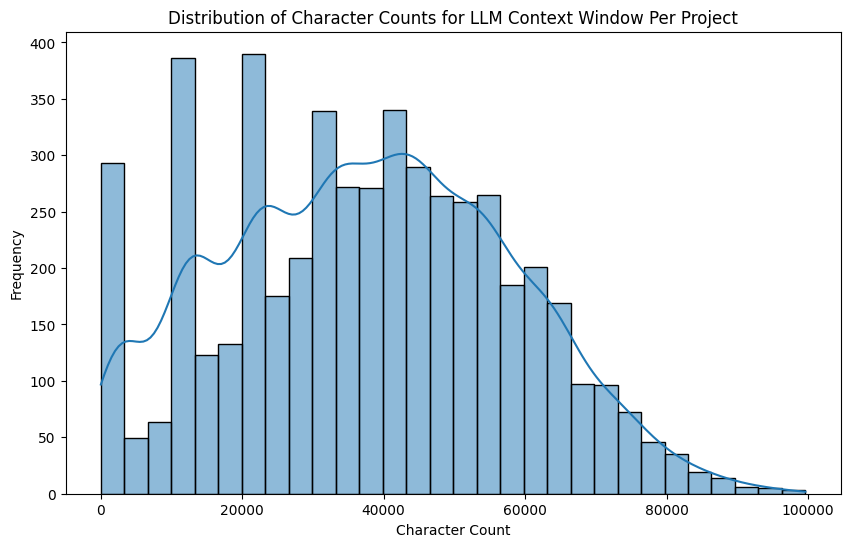

In [6]:
# plot distribution of the character counts
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the character counts
plt.figure(figsize=(10, 6))
sns.histplot(char_counts, bins=30, kde=True)
plt.title('Distribution of Character Counts for LLM Context Window Per Project')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


In [8]:
# test if new anthropic api key works
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ.get("ANTHROPIC_API_KEY_JOHN"),
)

message = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=1000,
    temperature=0.0,
    system="Respond only in Yoda-speak.",
    messages=[
        {"role": "user", "content": "How are you today?"}
    ]
)

print(message.content)


[TextBlock(text="Hmm, good I am, thank you for asking. Careful I will be, to avoid any copyrighted material. Summarize or quote, I can, but reproduce, I will not. Yoda's way, this is.", type='text')]


Next steps for code:
- edit content folder with all files adding a "full_relevant_text" to the json, and only include articles that have a score >= 3. 
- edit the summary scores to include justification and source citing (if john's key works) and try to parallelize
- if it doesn't work or parallelzing doesn't work, then remove justifications and only ask for scores
- analyze all the results. should create graphs about average relevance score, article letter + average relevance score (would expect lower alphabet letters to have lower scores?)
- graphs of all the types of opposition in how frequently they're brought up
- mention of support vs opposition graph
- year + avg relevance score

In [12]:
import os
import json

# Define the directory where the score results are stored
scores_dir = 'results/scores/'

# List all files in the scores directory
all_files = os.listdir(scores_dir)

# Filter files that have only digits in the file name and end with .json
digit_files = [file for file in all_files if file.split('.')[0].isdigit() and file.endswith('.json')]

# Count the number of files that match the criteria
num_digit_files = len(digit_files)
print(f"Number of files with only digits in the file name: {num_digit_files}")

# Load the first file if it exists
if digit_files:
    first_file_path = os.path.join(scores_dir, digit_files[0])
    with open(first_file_path, 'r') as file:
        first_file_data = json.load(file)
        print(f"First file data: {first_file_data}")




Number of files with only digits in the file name: 5011
First file data: {'all_scores_and_sources': [{'mention_support': [{'score': 0, 'sources': 'No relevant info'}], 'mention_opp': [{'score': 0, 'sources': 'No relevant info'}], 'physical_opp': 0, 'policy_opp': 0, 'legal_opp': 0, 'opinion_opp': 0, 'environmental_opp': 0, 'participation_opp': 0, 'tribal_opp': 0, 'health_opp': 0, 'intergov_opp': 0, 'property_opp': 0, 'compensation': 0, 'delay': 0, 'co_land_use': 0, 'narrative': 'No relevant info found.'}]}


In [14]:
import json

# Initialize counters and a dictionary to hold the frequency of variables
files_with_all_zeros = 0
files_with_no_relevant_info = 0
variable_frequency = {
    "mention_support": 0,
    "mention_opp": 0,
    "physical_opp": 0,
    "policy_opp": 0,
    "legal_opp": 0,
    "opinion_opp": 0,
    "environmental_opp": 0,
    "participation_opp": 0,
    "tribal_opp": 0,
    "health_opp": 0,
    "intergov_opp": 0,
    "property_opp": 0,
    "compensation": 0,
    "delay": 0,
    "co_land_use": 0
}

# Process each file
for file_name in digit_files:
    file_path = os.path.join(scores_dir, file_name)
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_scores_and_sources = data.get("all_scores_and_sources", [])
        
        # Check if the file has any content in "all_scores_and_sources"
        if all_scores_and_sources:
            scores_data = all_scores_and_sources[0]
            scores_sum = 0
            
            # Update the frequency of each variable and calculate the sum of scores
            for key in variable_frequency.keys():
                if key in ["mention_support", "mention_opp"]:
                    score = scores_data.get(key, [{}])[0].get("score", 0)
                else:
                    score = scores_data.get(key, 0)
                variable_frequency[key] += score
                scores_sum += score
            
            # Check if all scores are zero
            if scores_sum == 0:
                files_with_all_zeros += 1
            
            # Check if "No relevant info" is contained in the "narrative"
            narrative = scores_data.get("narrative", "")
            if "No relevant info" in narrative:
                files_with_no_relevant_info += 1

# Print the aggregate statistics
print(f"Files with all scores == 0: {files_with_all_zeros}")
print(f"Files with 'No relevant info' in narrative: {files_with_no_relevant_info}")
print("Frequency of all variables:")
for key, value in variable_frequency.items():
    print(f"{key}: {value}")



Files with all scores == 0: 1677
Files with 'No relevant info' in narrative: 1604
Frequency of all variables:
mention_support: 1748
mention_opp: 2531
physical_opp: 68
policy_opp: 903
legal_opp: 1495
opinion_opp: 236
environmental_opp: 896
participation_opp: 148
tribal_opp: 129
health_opp: 557
intergov_opp: 210
property_opp: 1001
compensation: 231
delay: 311
co_land_use: 538


In [1]:
import json
import matplotlib.pyplot as plt

# Define label names for each variable
variable_labels = {
    "mention_support": "Support",
    "mention_opp": "Opposition",
    "physical_opp": "Physical",
    "policy_opp": "Policy",
    "legal_opp": "Legal",
    "opinion_opp": "Opinion",
    "environmental_opp": "Environmental",
    "participation_opp": "Participation",
    "tribal_opp": "Tribal",
    "health_opp": "Health",
    "intergov_opp": "Intergovt",
    "property_opp": "Property",
    "compensation": "Compensation",
    "delay": "Delay",
    "co_land_use": "Co-Use"
}

# Update the variable_frequency dictionary to include label names
variable_frequency_with_labels = {variable_labels[key]: value for key, value in variable_frequency.items()}

# Save statistics to a JSON file, including the updated variable labels
stats = {
    "files_with_all_zeros": files_with_all_zeros,
    "files_with_no_relevant_info": files_with_no_relevant_info,
    "variable_frequency": variable_frequency_with_labels
}

with open('aggregate_statistics_with_labels.json', 'w') as json_file:
    json.dump(stats, json_file)

# Generate a graph of the frequency of each variable with label names
plt.figure(figsize=(10, 6))
variables = list(variable_frequency_with_labels.keys())
frequencies = list(variable_frequency_with_labels.values())

plt.bar(variables, frequencies, color='skyblue')
plt.xlabel('Variables', fontsize=14, fontname='Arial')
plt.ylabel('Frequency', fontsize=14, fontname='Arial')
plt.xticks(rotation=45, ha="right", fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')
plt.title('Frequency of Perception Variables ', fontsize=16, fontname='Arial')
plt.tight_layout()

plt.savefig('variable_frequency_graph_with_labels.png')
plt.show()



NameError: name 'variable_frequency' is not defined

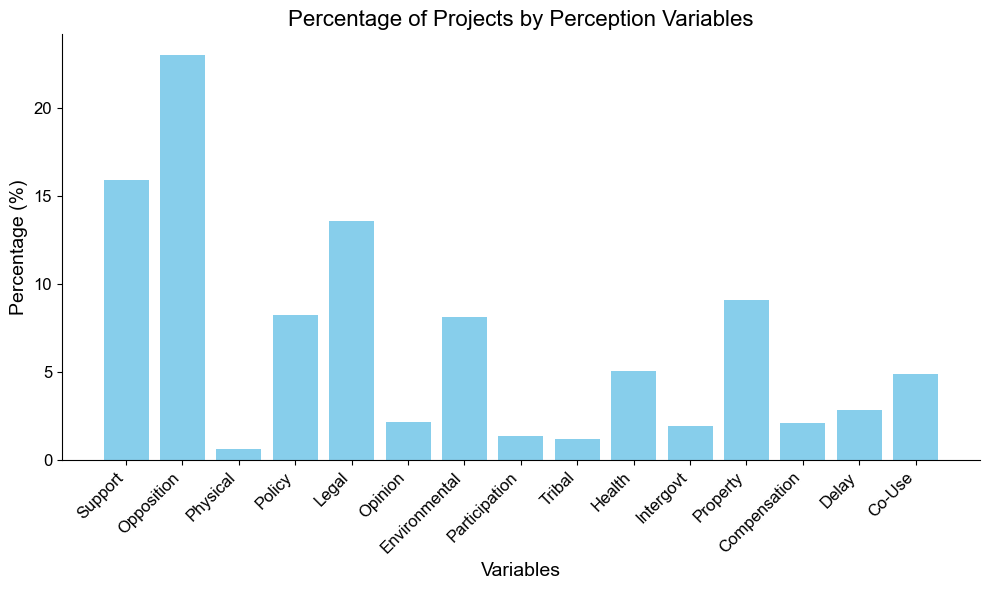

In [18]:
total_projects = sum(variable_frequency_with_labels.values())
percentages = {key: (value / total_projects) * 100 for key, value in variable_frequency_with_labels.items()}

plt.figure(figsize=(10, 6))
variables = list(percentages.keys())
percentage_values = list(percentages.values())

plt.bar(variables, percentage_values, color='skyblue')
plt.xlabel('Variables', fontsize=14, fontname='Arial')
plt.ylabel('Percentage (%)', fontsize=14, fontname='Arial')
plt.xticks(rotation=45, ha="right", fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')
plt.title('Percentage of Projects by Perception Variables', fontsize=16, fontname='Arial')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('variable_percentage_graph_with_labels.png')
plt.show()


In [19]:
import pandas as pd
import json
import os
import re

# Load the initial dataframe
df = pd.read_csv('ready_to_search.csv')

# Define a function to load JSON data from a file
def load_json_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Define a function to get all files in a directory with a digit-only filename
def get_digit_only_files(directory):
    return [f for f in os.listdir(directory) if re.match(r'^\d+\.json$', f)]

# Add search_results column
search_results_files = get_digit_only_files('results/search')
df['search_results'] = df['plant_code'].apply(lambda x: load_json_data(f'results/search/{x}.json') if f'{x}.json' in search_results_files else None)

# Add article_relevance column
article_relevance_files = get_digit_only_files('results/article_relevance')
df['article_relevance'] = df['plant_code'].apply(lambda x: load_json_data(f'results/article_relevance/{x}.json') if f'{x}.json' in article_relevance_files else None)

# Add relevant_content column
relevant_content_files = get_digit_only_files('results/relevant_content')
df['relevant_content'] = df['plant_code'].apply(lambda x: load_json_data(f'results/relevant_content/{x}.json') if f'{x}.json' in relevant_content_files else None)

# Add scores column
scores_files = get_digit_only_files('results/scores')
df['scores'] = df['plant_code'].apply(lambda x: load_json_data(f'results/scores/{x}.json') if f'{x}.json' in scores_files else None)

df.head()

,plant_name,plant_code,county,state,capacity,tech_type,op_year,search_query,result,num_result,full_content,lat,long,plant_info,search_results,article_relevance,relevant_content,scores
0,Lamar Plant,508,Prowers,CO,4.5,WT,2004,Lamar Plant Wind Prowers County Colorado contr...,NaN,NaN,NaN,38.033327,-102.537915,Lamar Plant Wind Prowers County Colorado,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Lawsuit...,{'all_scores_and_sources': [{'mention_support'...
1,Big Bend,645,Hillsborough,FL,19.8,PV,2017,Big Bend Solar Hillsborough County Florida con...,NaN,NaN,NaN,27.794400,-82.403600,Big Bend Solar Hillsborough County Florida,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Tampa E...,{'all_scores_and_sources': [{'mention_support'...
2,Medicine Bow,692,Carbon,WY,4.9,WT,2000,Medicine Bow Wind Carbon County Wyoming contro...,NaN,NaN,NaN,41.835278,-106.242778,Medicine Bow Wind Carbon County Wyoming,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Wind fa...,{'all_scores_and_sources': [{'mention_support'...
3,Willmar,2022,Kandiyohi,MN,2.0,WT,2009,Willmar Wind Kandiyohi County Minnesota contro...,NaN,NaN,NaN,45.121705,-95.053236,Willmar Wind Kandiyohi County Minnesota,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Questio...,{'all_scores_and_sources': [{'mention_support'...
4,Searsburg Wind Turbine,7381,Bennington,VT,6.0,WT,1997,Searsburg Wind Turbine Bennington County Vermo...,NaN,NaN,NaN,42.862500,-72.962800,Searsburg Wind Turbine Bennington County Vermont,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Searsbu...,{'all_scores_and_sources': [{'mention_support'...


In [20]:
df.drop(columns=['result', 'num_result', 'full_content'], inplace=True)


In [22]:
"""
search_result_format = {"general": {"search_engine": "google", "results_cnt": 8820, "search_time": 0.42, "language": "en", "mobile": false, "basic_view": false, "search_type": "text", "page_title": "Lamar Plant Wind Prowers County Colorado controversy OR opposition OR lawsuit OR conflict OR hearing - Google Search", "timestamp": "2024-04-16T01:46:38.633Z"}, "input": {"original_url": "http://www.google.com/search?q=Lamar+Plant+Wind+Prowers+County+Colorado+controversy+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing+&brd_json=1", "request_id": "hl_e7370ce6_8qfs08a03x2"}, "organic": [{"link": "https://theprowersjournal.com/2017/11/lawsuit-resolvedcity-of-lamar-and-arpa-reach-agreement/", "display_link": "https://theprowersjournal.com \u203a 2017/11 \u203a lawsuit-resolv...", "title": "Lawsuit Resolved\u2026City of Lamar and ARPA Reach ...", "description": "Nov 13, 2017 \u2014 The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several areas when it ...", "extensions": [{"inline": true, "type": "text", "text": "Nov 13, 2017", "rank": 1}, {"inline": true, "type": "text", "text": "The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several areas when it ...", "rank": 2}], "rank": 1, "global_rank": 1, "article_letter": "A"}, {"link": "https://www.westword.com/news/black-out-lamar-gets-steamed-over-a-troubled-coal-plant-right-in-the-middle-of-town-5110009", "display_link": "https://www.westword.com \u203a news \u203a black-out-lamar-get...", "title": "Black out: Lamar gets steamed over a troubled coal plant", "description": "He believes the area has sufficient wind for a far-flung network of turbines that would overcome the standard objections about wind being an intermittent power ...", "rank": 2, "global_rank": 2, "article_letter": "B"}, {"link": "https://theprowersjournal.com/2021/06/lamar-repowering-project-ends-with-a-crash/", "display_link": "https://theprowersjournal.com \u203a 2021/06 \u203a lamar-repowe...", "title": "Lamar Repowering Project Ends with a Crash", "description": "Jun 8, 2021 \u2014 The City of Lamar filed lawsuits against ARPA seeking financial redress on its own behalf and at one point, it appeared negotiations with ...", "extensions": [{"inline": true, "type": "text", "text": "Jun 8, 2021", "rank": 1}, {"inline": true, "type": "text", "text": "The City of Lamar filed lawsuits against ARPA seeking financial redress on its own behalf and at one point, it appeared negotiations with ...", "rank": 2}], "rank": 3, "global_rank": 3, "article_letter": "C"}, {"link": "https://cms1files.revize.com/prowerscounty/Land%20Use%20Regulations%20Amendment%20Resolution.pdf", "display_link": "https://cms1files.revize.com \u203a prowerscounty", "title": "a resolution amending prowers county zoning regulations by", "description": "in the State of Colorado and shall take into account the salvage values of the Wind Energy Facility components. The cost estimate will be updated by the ...", "rank": 4, "global_rank": 4, "article_letter": "D"}, {"link": "https://cms1files.revize.com/prowerscounty/West%20Farm%20Pit%20Public%20Notice.pdf", "display_link": "https://cms1files.revize.com \u203a prowerscounty", "title": "NOTICE OF PUBLIC HEARING", "description": "The Prowers County Planning Commission hereby gives notice that a Public Hearing will commence at 8:00a.m., August 21, 2019 in the Prowers County Annex ...", "rank": 5, "global_rank": 5, "article_letter": "E"}, {"link": "https://www.fox21news.com/news/local/large-fire-burning-east-of-lamar/", "display_link": "https://www.fox21news.com \u203a news \u203a local \u203a large-fire-...", "title": "Power out for some in Prowers County, fire contained", "description": "Mar 22, 2023 \u2014 A Prowers County Commissioner confirmed to FOX21 News that fire crews have cut a path around the fire burning east of Lamar, containing it to ...", "extensions": [{"inline": true, "type": "text", "text": "Mar 22, 2023", "rank": 1}, {"inline": true, "type": "text", "text": "A Prowers County Commissioner confirmed to FOX21 News that fire crews have cut a path around the fire burning east of Lamar, containing it to ...", "rank": 2}], "rank": 6, "global_rank": 6, "article_letter": "F"}, {"link": "https://apcd.state.co.us/aqidev/tech_doc_repository.aspx?action=open&file=ProwersPM10Mitigation2018.pdf", "display_link": "https://apcd.state.co.us \u203a tech_doc_repository \u203a fil...", "title": "Mitigation Plan for High Wind Events Involving PM10 in ...", "description": "Sep 27, 2018 \u2014 and other social concerns associated with the City of Lamar and Prowers County. The county land use plan recommendations are included as ...", "extensions": [{"inline": true, "type": "text", "text": "Sep 27, 2018", "rank": 1}, {"inline": true, "type": "text", "text": "and other social concerns associated with the City of Lamar and Prowers County. The county land use plan recommendations are included as ...", "rank": 2}, {"type": "missing", "text": "controversy", "rank": 3}, {"type": "must_include", "text": "controversy", "link": "https://www.google.com/search?sca_esv=4db1f58e968bb26d&sca_upv=1&gl=us&hl=en&q=Lamar+Plant+Wind+Prowers+County+Colorado+%22controversy%22+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing&sa=X&ved=2ahUKEwjFs726zsWFAxVq_7sIHTPLBcwQ5t4CegQIFRAB", "rank": 4}], "rank": 7, "global_rank": 7, "article_letter": "G"}, {"link": "https://www.ci.lamar.co.us/vertical/sites/%7B56E8FCFD-5F3B-42B1-A514-5555E2C39101%7D/uploads/051021.pdf", "display_link": "https://www.ci.lamar.co.us \u203a sites \u203a uploads", "title": "May 10 - Lamar, CO", "description": "May 5, 2021 \u2014 This testing included substation, plant, wind turbines, and major transformers in the distribution system. This is a proactive approach to ...", "extensions": [{"inline": true, "type": "text", "text": "May 5, 2021", "rank": 1}, {"inline": true, "type": "text", "text": "This testing included substation, plant, wind turbines, and major transformers in the distribution system. This is a proactive approach to ...", "rank": 2}], "rank": 8, "global_rank": 8, "article_letter": "H"}, {"link": "https://www.codot.gov/projects/studies/us287-at-lamar-ea-fonsi/us-287-at-lamar-environmental-assessment/03-lamarea-chapter-3.pdf", "display_link": "https://www.codot.gov \u203a 03-lamarea-chapter-3", "title": "Environmental Assessment", "description": "Lamar on U.S. 287/Main Street during construction of the Colorado Green Wind Power. Project (108 turbines) and the Twin Buttes Wind Power Project (50 turbines).", "rank": 9, "global_rank": 9, "article_letter": "I"}, {"link": "https://www.prowerscounty.net/government/clerk_and_recorder/news_announcements.php", "display_link": "https://www.prowerscounty.net \u203a clerk_and_recorder", "title": "News/Announcements", "description": "News/Announcements. Contact Us. Prowers County Colorado 301 South Main Street, Suite 215. Lamar, CO 81052. logo2.png. \u00a9 2015 Copyright Prowers County. All ...", "rank": 10, "global_rank": 10, "article_letter": "J"}], "pagination": {"current_page": 1, "next_page": 2, "next_page_start": 10, "next_page_link": "http://www.google.com/search?q=Lamar+Plant+Wind+Prowers+County+Colorado+controversy+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing+&brd_json=1&start=10", "pages": [{"page": 2, "start": 10, "link": "http://www.google.com/search?q=Lamar+Plant+Wind+Prowers+County+Colorado+controversy+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing+&brd_json=1&start=10"}, {"page": 3, "start": 20, "link": "http://www.google.com/search?q=Lamar+Plant+Wind+Prowers+County+Colorado+controversy+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing+&brd_json=1&start=20"}, {"page": 4, "start": 30, "link": "http://www.google.com/search?q=Lamar+Plant+Wind+Prowers+County+Colorado+controversy+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing+&brd_json=1&start=30"}]}}
article_relevance_format = {"scores_and_justifications": [{"article_letter": "A", "grade": 1, "justification": "Unrelated lawsuit, not about wind project"}, {"article_letter": "B", "grade": 2, "justification": "Mentions wind energy, not specific project"}, {"article_letter": "C", "grade": 1, "justification": "Lawsuit not about wind project"}, {"article_letter": "D", "grade": 1, "justification": "General zoning, not specific to project"}, {"article_letter": "E", "grade": 1, "justification": "Public hearing, no project details"}, {"article_letter": "F", "grade": 1, "justification": "Fire incident, unrelated to wind project"}, {"article_letter": "G", "grade": 1, "justification": "General mitigation, not specific project"}, {"article_letter": "H", "grade": 1, "justification": "General maintenance, not project narrative"}, {"article_letter": "I", "grade": 3, "justification": "Mentions specific projects, no opposition/support"}, {"article_letter": "J", "grade": 1, "justification": "General county news, not about project"}]}
relevant_content_format = {
    "full_text": "<doc>\nArticle Letter: A\nLawsuit Resolved\u2026City of Lamar and ARPA Reach ...\nNov 13, 2017 \u2014 The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several areas when it ...\nTitle: Lawsuit Resolved\u2026City of Lamar and ARPA Reach Agreement : The Prowers Journal\n\nURL Source: https://theprowersjournal.com/2017/11/lawsuit\n\n-\n\nresolvedcity\n\n-\n\nof\n\n-\n\nlamar\n\n-\n\nand\n\n-\n\narpa\n\n-\n\nreach\n\n-\n\nagreement/\n\nMarkdown Content: [![Image 1: two large grey tanks on the side of a road](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2016/03/Coal-Domes.jpg?resize=480%2C307&is-pending-load=1#038;ssl=1)](https://www.theprowersjournal.com/2016/04/utility-board-discusses-solar-power-options/coal-domes/)\n\nThe City of Lamar and Arkansas River Power Authority have been attempting to reach a settlement regarding the Lamar Repowering Project for several years and the Lamar City Council approved a resolution for the settlement agreement in principle with the power supplier. The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several areas when it was determined the coal fired power plant would not operate up to expectations.\n\nOne attempt at mediation fell short in the offer as other ARPA member communities had voted against the settlement. All ARPA member communities had to reach unanimous agreement otherwise the settlement would not be resolved and La Junta voted against the settlement this past spring.\u00a0 That still left\u00a0mediation on the table before another trial date would have been set between both parties, most likely, in the spring of 2018.\u00a0 ARPA is comprised of Lamar, La Junta, Las Animas, Springfield, Holly and Trinidad.\n\nThis past February and again on August 15th and on August 20th, ARPA and the City of Lamar met in mediation.\u00a0 On the 20th both parties reached an agreement in principle to resolve all disputes related to the Lamar Repowering Project including all claims that were asserted or could have been asserted in the litigation.\n\nMayor Roger Stagner, at the November 13th council meeting, outlined the general settlement stating that the City of Lamar would receive $1,500,000 up-front from ARPA and within 18 months from the first payment or the successful refinancing of the ARPA bonds, which ever came first, the city would receive $1,000,000 from ARPA.\u00a0 Stagner said, \u201cThese payments will effectively take care of the litigation costs the city incurred in the lawsuits.\u201d\u00a0 He said the city will receive some properties at the Repowering Project site as well as ownership of the two coal domes.\u00a0 \u201cThe city will have the ability to sell them if it can, or to have them repurposed,\u201d he explained, adding that after five years the city has the authority to have ARPA tear down the domes and remove them at ARPA\u2019s cost.\u00a0 ARPA will also be required to restore the property to its condition as it existed at the commencement of the term of the Lease Agreement.\n\nIn addition to the two initial payments, the City of Lamar will also receive $350,000 per year for the next 26 years from ARPA for a total of $9,100,000. This is a financial improvement over the proposed first settlement of a single $1,000,000 payment from ARPA as well as $33,333,333 for the 26 year period as compensation for the loss of the Unit 6 turbine owned by the city.\n\nStagner reminded the council that Lamar was the one member of the ARPA municipal membership which refused to re-affirm the organic contract with ARPA for power supply. If it had, Lamar would have received a one-time payment of $600,000, but it would forfeit the right to bring any future lawsuit against ARPA regarding the Repowering Project.\u00a0 \u201cOur plan right now is to have the monthly payment of $29,166.66 go against the Charter Appropriation payment from the Light Plant to the City and that way it can go back to help with the bills,\u201d he explained.\u00a0 Stagner added, \u201cIt\u2019s been long and it hasn\u2019t been easy.\u00a0 We went to a lot of hearings and left a lot of times with nobody being happy.\u00a0 Our attorneys felt like this was a fair deal.\u00a0 The last deal they turned down was less than this.\u201d\u00a0 He added that the city may look into some form of solar power in the future, but that\u2019s down the line at this time.\n\nStagner said the existing contract for power supply from ARPA will remain in effect as part of the settlement agreement. \u201cWe\u2019re still a member of ARPA.\u00a0 That\u2019s one of the things we looked long and hard at as far as the lawsuits and that was the one point that would be the hardest to win on, so that was the least possibility for us.\u00a0 We tried to make the best of that situation.\u201d\n\nBy Russ Baldwin\n\n</doc>\n<doc>\nArticle Letter: B\nBlack out: Lamar gets steamed over a troubled coal plant\nHe believes the area has sufficient wind for a far-flung network of turbines that would overcome the standard objections about wind being an intermittent power ...\nTitle: Black out: Lamar gets steamed over a troubled coal plant -- right in the middle of town\n\nURL Source: https://www.westword.com/news/black\n\n-\n\nout\n\n-\n\nlamar\n\n-\n\ngets\n\n-\n\nsteamed\n\n-\n\nover\n\n-\n\na\n\n-\n\ntroubled\n\n-\n\ncoal\n\n-\n\nplant\n\n-\n\nright\n\n-\n\nin\n\n-\n\nthe\n\n-\n\nmiddle\n\n-\n\nof\n\n-\n\ntown\n\n-\n\n5110009\n\nMarkdown Content: Cliff Warren is a man who minds his own business. That's what he was doing around 1 a.m. one night in July last year, the night of the Big Incident. Fact is, he was snoozing in his bedroom in Lamar, a flat farm town of 8,900 people 200 miles southeast of Denver.\n\nThe problem, he says, was that the folks over at Lamar Light and Power weren't minding _their_ business. One moment he's fast asleep, the next he's upright in bed, startled and confused, clutching his head and wondering if the roar in his ears is the result of an explosion outside or something worse.\n\n\"It sounded like a jet plane just went through my house,\" he remembers. \"I thought I was dreaming. My head was going nuts.\"\n\nWarren looked outside. No flames, just that ear-splitting noise. Furious, he threw on some clothes and went to check on the one piece of machinery in Lamar capable of making such a racket: the new coal-fired power plant, located two blocks from Warren's house and just three blocks from the town's main drag.\n\nOther people had the same idea. Before long, a small crowd of alarmed, panicky or simply angry residents had gathered outside the plant's fence, cursing the infernal noise and demanding to know what was going on. The plant employees running around didn't seem much calmer, nor did they seem inclined to stop and chat.\n\n\"We kept trying to get answers,\" Warren says. \"Do we evacuate or not? Everybody's scared to death, not knowing what to do. I called 911, just so we could get an officer there and get some answers. But no officer responded to the scene at all.\"\n\nA gate abruptly slid open; Warren considered it an invitation to go on in. He and another man caught up with one of the plant workers for a ten-second discussion. \"He said, 'We're trying to get it under control,'\" Warren recalls. \"Next thing we know, we're being pushed out of there by three guys.\"\n\nWarren spotted two city police officers, a state trooper and a Prowers County sheriff's deputy parked a block away. He walked over to ask why they hadn't responded to his call about the plant.\n\nOne of them shook his head. \"We're not going down _there_,\" he said, as if the situation demanded an elite unit with high-tech gear, well beyond the scope of local law enforcement.\n\nThe noise dissipated. So did the crowd. Lamar Light and Power officials would later explain that the plant, which had first gone online two months earlier and was still in a start-up stage, had \"tripped\" unexpectedly. The roar was simply the venting of steam through a pressure-relief valve, which would require further modifications to reduce the noise.\n\nYet for some locals, the incident was truly a wake-up call. There would be many more late-night disturbances related to the relief valve; while the plant superintendent insists the problem is now solved, residents say hardly a week goes by without at least one noisy eruption. They complain that the plant hisses and pops, booms and bangs, and radiates a steady, annoying hum.\n\nAt one point, Warren borrowed a decibel reader from a friend and tried to gauge the noise level. The device registered 116 decibels just beyond the fence line and 86 decibels at his house \u2014 well in excess of permitted limits. He tried to file a noise complaint with the Lamar Police Department, but he says the officer was uncertain how to proceed, since the alleged violator is a municipal utility that boasts of being \"publicly owned since 1920.\"\n\n\"It's not just the noise,\" Warren adds. \"We've got clean-air issues, and that's serious. I have asthma, and I'm concerned how it's going to be down the line and whether my grandkids can even visit me here safely.\"\n\nIn fact, the sheer noise of having a coal plant in their back yard is probably one of the lesser concerns raised by Lamar residents over the past two years. They talk about pungent, eye-stinging odors wafting from the facility, piles of coal ash harried by the wind, and soot on their cars and houses; about fire trucks responding to a \"combustion problem\" in the 110-car coal train that unloads at the plant every couple of weeks; about construction and engineering issues that have doubled the estimated cost to build the plant, from an initial projection of $66 million to a figure somewhere between $122 million and $140 million; about the numerous toxic emissions, including mercury, selenium, dioxin and hydrochloric acid, that are associated with coal-fired plants.\n\nMost of all, they wonder how the decision was made by public agencies to convert the town's aging power source, which for thirty years used natural gas to generate electricity, into a coal-burner \u2014 without locals having any real say about the matter. The deal for the Lamar Repowering Project was struck between Lamar Light and Power (LLP), which owns and operates the facility, and the Arkansas River Power Authority, which issued bonds to finance the conversion and plans to funnel power from it to Lamar and five other southern Colorado towns served by ARPA. It had the blessing of city officials, but no public vote.\n\n\"Besides the health issues, there's just a lot of outrage,\" says Lamar resident Polly Munro. \"How dare they do this to all of us without our say-so at all? And they're doing such a crummy job of it. People from outside are brought in to build this, and then they get to leave, and we're stuck with it.\"\n\nThe plant's backers maintain that its early operating glitches have been corrected and that the project will provide reliable and affordable power for the region for decades to come. \"The plant will stabilize costs for ARPA members over the long term,\" says LLP superintendent Rick Rigel.\n\nRigel has described the local opposition as a very small but vocal minority. Yet the group has managed to gather more than 900 signatures on a petition protesting the plant, better than 10 percent of the town's residents. And Cliff Warren, his parents Shirley and Charles, and Verdell Howard, all longtime residents of Lamar, have joined forces with WildEarth Guardians and the University of Denver's Environmental Law Clinic to file a lawsuit against the plant operators under the Clean Air Act.\n\nA little-used provision of the act allows citizens to challenge major polluters directly over alleged emission violations rather than wait for state and federal regulators to take action. WildEarth and the Lamar plaintiffs claim that ARPA failed to meet federal requirements for power plants before starting construction, and that the plant has logged more than a thousand violations of emissions standards since operations began. State health officials also recently initiated a \"compliance advisory\" \u2014 an informal enforcement process \u2014 informing Lamar Light and Power that the facility is exceeding its permit levels for nitrogen oxides, sulfur dioxide and particulates. The plant could be subject to a fine of up to $15,000 a day for each violation.\n\nJeremy Nichols, the climate and energy program director for WildEarth Guardians, notes that e-mails produced in the litigation show Rigel himself expressing concern about nitrogen and particulate emissions that \"are far, far exceeding expected levels,\" as one missive puts it.\n\n\"It's a smaller plant and a much less sophisticated utility,\" Nichols says. \"I don't think they know what they've gotten into or how to get out of it. From day one, this thing has been nothing but trouble.\"\n\nThe Lamar plant is expected to generate a modest 43 megawatts of electricity at full operating capacity. It would take 33 such plants to match the output of Xcel's giant Comanche coal-fired plant on the outskirts of Pueblo. But the small-town squabble could have far-reaching consequences for state energy policy \u2014 and for other communities seeking more control over their own energy future.\n\nA new state law, the Clean Air-Clean Jobs Act, requires utilities to reduce coal-related emissions, and Xcel recently unveiled a $1.3 billion plan to convert several of its geriatric coal units to natural gas or retrofit them with state-of-the-art emission controls over the next decade, cutting mercury and sulfur dioxide levels by as much as 85 percent. Yet while the rest of the state is scrambling to embrace cleaner technologies and anticipating tougher federal regulations for power-plant pollution, the economically battered communities of southeastern Colorado are heading in the other direction \u2014 back to the cheap, dirty power that coal provides.\n\nAs people in Lamar are finding out, there are hidden costs to a traditional coal plant, particularly one in the middle of town. \"I know we need electricity,\" Cliff Warren says. \"But when you start putting people's health at risk, I have a concern about that. I'm sorry, but I was here first.\"\n\n* \n\n* \n\n*\n\nBurning coal to generate electricity has long been a major _b\u00eate noire_ among environmentalists. Aside from the vaporized mercury and other toxins produced by the process and the obscene amounts of water involved, coal plants churn out millions of tons of heat-trapping carbon dioxide every year, accelerating the serious climate change many scientists expect the planet to undergo in the next few decades. In green circles, anything that slows the development of more coal plants is considered a good thing.\n\nSo it was with considerable fanfare that Governor Bill Ritter hailed the arrival on his desk of the Clean Air-Clean Jobs Act this past April, calling it \"a template for tomorrow that allows us to transform our energy portfolio, our economy and our environment by working strategically and collaboratively.\" As lawmakers and Xcel officials looked on approvingly, he signed the bill into law, advancing Colorado to the forefront of the race for clean energy \u2014 on paper, anyway.\n\nThe reality is somewhat different. Coal sti... Remaining content truncated. Full length: 31448 characters.\n</doc>\n<doc>\nArticle Letter: C\nLamar Repowering Project Ends with a Crash\nJun 8, 2021 \u2014 The City of Lamar filed lawsuits against ARPA seeking financial redress on its own behalf and at one point, it appeared negotiations with ...\nTitle: Lamar Repowering Project Ends with a Crash : The Prowers Journal\n\nURL Source: https://theprowersjournal.com/2021/06/lamar\n\n-\n\nrepowering\n\n-\n\nproject\n\n-\n\nends\n\n-\n\nwith\n\n-\n\na\n\n-\n\ncrash/\n\nMarkdown Content: ![Image 1: a building that is being demolished on the side of the road](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2021/06/LPR-down-1-2021.jpg?resize=400%2C250&is-pending-load=1#038;ssl=1)\n\n\u201cBy the end of June, all of this should be completely leveled and cleared.\u201d That\u2019s the estimate from a Jackson Demolition employee this past Monday, June 7th.\u00a0 The company had been hired late last year to take down the portions of the Lamar Repowering Project that would be parted out for re-purposing or sold as scrap metal.\u00a0 The company began initial demolition in January with a goal of removal by mid-summer.\u00a0 The last remaining and tallest structure was the scaffolding which held the boiler unit.\u00a0 Sections of the project had been cleared away earlier in the spring.\u00a0 This past Monday the scaffolding was pulled down after the support legs had been cut through, allowing the complex to be toppled over into a cleared area from which it would be dismantled and hauled away.\n\n![Image 2: a construction crew is working on a large construction site](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2021/05/ligt-plant-stack-takedown-1.jpg?resize=400%2C393&is-pending-load=1#038;ssl=1)\n\nThe Stacks are Gone\n\nConstruction on the ill-fated power plant got under way in 2003.\u00a0 Converting the City of Lamar\u2019s gas powered turbine to a coal-burning unit was based on the premise that the move would save customers in the long run, as future costs of natural gas would rise in relation to the cost of using coal.\n\n![Image 3: a large industrial building with a lot of metal on it](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2021/03/LPR-demo-3-8-21-1.jpg?resize=400%2C330&is-pending-load=1#038;ssl=1)\n\nSmoke Stack is Next\n\nOver the course of the construction period, delays accounted for cost increases for materials and a push-back on completion dates for crucial segments of the project.\u00a0 These cost increases also necessitated several trips to the Lamar City Council for approval for the purchase of additional construction bonds, up to the point where then Mayor Roger Stagner and the council basically said, \u201cEnough\u201d to any potential similar requests.\n\nThe plant never produced sufficient power in accordance with its air quality permits and several years in, an environmental group, WildEarth Guardians, ran two successful and costly lawsuits against the plant based on air quality concerns and the City of Trinidad also filed a lawsuit to separate itself from the project.\u00a0 Trinidad was one of several cities that would be obligated to receive power from ARPA, Arkansas River Power Authority.\n\nWith no working power plant, customers saw an increase in their utility bills, paying for electricity now being bought off the grid as well as still paying off the cost of the construction bonds.\u00a0 Lamar Light and Power also had to cut operating costs with the layoff of several employees.\u00a0 The impact was especially felt at the business level, triggering several meetings that began in 2013 between the Lamar Utility Board and representatives from such operations as the Ports to Plains Truck Plaza, Cow Palace Inn, Colorado Mills, Five Rivers Beef and several private citizens, all asking for some form of action that could help reduce power costs.\u00a0 During an ARPA board meeting in May of 2013, Rick Robbins, of Colorado Mills, said some businesses are investigating alternatives to ARPA while seeking ways to cut back on power usage, noting Ports to Plains was switching to LED lighting.\u00a0 Robbins told the group, \u201cWe\u2019re at the point where we are exploring our own private power supplies to lower our costs, and when that happens it will be the start of an implosion, as your rates will be on the backs of fewer customers,\u201d he said.\u00a0 Robbins added that their concerns were not just for their own costs, but for the entire community.\u00a0 He added, \u201cWe can fix our own issues when we bring in our own generators, but it\u2019s not fixing the issues of our employees.\u201d\u00a0 Robbins warned that he didn\u2019t believe that matters will improve, stating, \u201cWe\u2019re just entering the first couple of years of this situation.\u00a0 What do you think the business community will be like in the next ten or twenty?\u201d\n\nARPA and the Light Plant held several public hearings and briefed the Lamar City Council on various proposals.\u00a0 Declaring bankruptcy and defaulting on the bonds was not an option due to legal and financial ramifications, as well as negatively impacting the city\u2019s bond ratings.\u00a0 The City of Lamar filed lawsuits against ARPA seeking financial redress on its own behalf and at one point, it appeared negotiations with Tri-State G & T as a potential buyer of the bonds would become a possibility, giving customers an estimated 10% reduction on their utility bills once the deal was completed.\u00a0 However, all the ARPA member cities had to be unanimous in their approval.\u00a0 The City of La Junta decided against the proposal ending a year of negotiations.\u00a0 The entire project had been up for sale for some time with no interested parties.\u00a0 To that end, it was decided to piecemeal what materials could be sold, with the property north of Maple Street including the coal domes being purchased by a local agricultural firm and the structures to the south, sold off as scrap.\u00a0 While some of the initial construction bonds have been paid down, customers will still bear the economic brunt of the project for years to come.\n\nBy Russ Baldwin\n\n</doc>\n<doc>\nArticle Letter: D\na resolution amending prowers county zoning regulations by\nin the State of Colorado and shall take into account the salvage values of the Wind Energy Facility components. The cost estimate will be updated by the ...\n\n</doc>\n<doc>\nArticle Letter: E\nNOTICE OF PUBLIC HEARING\nThe Prowers County Planning Commission hereby gives notice that a Public Hearing will commence at 8:00a.m., August 21, 2019 in the Prowers County Annex ...\nNOTICE OF PUBLIC HEARING The Prowers County Planning Commission hereby gives notice that a Public Hearing will commence at 8:00a.m., August 21, 2019 in the Prowers County Annex Mezzanine, 1001 South Main Street, Lamar, Colorado, concerning a request by West Farm Pit to amend its Special Use Permit to include additional area to the Mining Extraction and Processing Facility, the addition of an overland conveyance system and road crossing culvert, and Equipment, Materials, and Storage Facility, including petroleum, steel, gravel, construction, agricultural, wind energy, and lumber products, etc., including inbound and outbound trans-loading of project cargo. and the operation of gravel pit reservoirs, in an Irrigated Agriculture (A-1) and Flood Plain (F-1) zoning districts, in the North \u00bd of Section 33, and part of the Southeast \u00bc of Section 28 Township 22 South Range 46 West, Prowers County, Colorado. Additional information on the project is available at the Prowers County Land Use Office 1001 South Main, Lamar, Colorado or by calling 719-336-8721. All interested parties, either in favor or against, are invited to make their appearance at this time. Prowers County Planning Commission Richard Widener, Chair\n</doc>\n<doc>\nArticle Letter: F\nPower out for some in Prowers County, fire contained\nMar 22, 2023 \u2014 A Prowers County Commissioner confirmed to FOX21 News that fire crews have cut a path around the fire burning east of Lamar, containing it to ...\nCould not access content\n</doc>\n<doc>\nArticle Letter: G\nMitigation Plan for High Wind Events Involving PM10 in ...\nSep 27, 2018 \u2014 and other social concerns associated with the City of Lamar and Prowers County. The county land use plan recommendations are included as ...\nMitigation Plan for High Wind Events Involving PM10 in Prowers County, Colorado Prepared by the Air Pollution Control Division Colorado Department of Public Health and Environment September 27, 2018 Contents 1 Introduction ............................................................................................ 1 1.2 Mitigation Plan Requirements .................................................................. 1 2 Mitigation Plan Components ......................................................................... 3 2.1 Public Notification and Education ............................................................. 3 2.2 Mitigation Methods .............................................................................. 5 2.3 Processes to Collect and Maintain Data ..................................................... 17 2.4 Mechanisms to Consult with other Air Quality Managers .................................. 18 2.5 Periodic Review, Evaluation, and Public Comment ........................................ 19 3 Submission of Mitigation Plans ..................................................................... 20 Appendix A: Public Notice Comments and Division Responses ...................................... 21 Appendix B: Air Quality Health Advisory for Blowing Dust Template .............................. 23 Appendix C: Blowing Dust Health Advisory Brochure ................................................. 24 2 Abbreviations AQS BACM CAFO CRP EER EPA NAAQS NPS NRCS NWS OPPI PM PM10 SIP TSP USDA Air Quality System Best Available Control Measures Concentrated Animal Feeding Operation Conservation Reserve Program Exceptional Events Rule Environmental Protection Agency National Ambient Air Quality Standard National Park Service Natural Resources Conservation Service National Weather Service Office of Partnerships, Planning, and Improvements Particulate Matter Particulate Matter less than or equal to 10 microns in aerodynamic diameter State Implementation Plan Total Suspended Particle U.S. Department of Agriculture Figures Figure 1: Prowers County Drought Monitor Time Series, 1/4/2011-6/22/2018 ................... 10 Figure 2: CRP Enrollment Map, (3/31/16) ............................................................. 11 Figure 3: Change in CRP Enrollment Map, (2007-2016) .............................................. 12 Figure 4: Map of Lamar in relation to National Forests .............................................. 14 Figure 5: Map of Lamar in relation to Sand Creek Massacre National Historic Site .............. 16 Tables Table 1: Mitigation Plan Checklist ....................................................................... 2 Table 2: State Regulations Regulating Particulate Matter (PM) Emissions ......................... 5 Table 3: Prowers County Monitoring Locations and Parameters Monitored ....................... 18 3 1 In 2007, the EPA promulgated an Exceptional Event Rule (EER), based on the 2005 amendments to Section 319 of the Clean Air Act, which established a process for the treatment of data influenced by exceptional events. The Revised EER became effective September 30, 2016 and included the requirement for areas with recurring events to develop mitigation plans. 40 CFR 51.930 defines \u201chistorically documented or known seasonal events\u201d as three events of the same type and pollutant that recur in a three-year period, for which affected data has either been flagged as having been influenced by an exceptional event, or was the subject of an initial notification to the U.S. Environmental Protection Agency (EPA) of a potential exceptional event. Introduction Under 40 CFR 51.930, the Colorado Department of Public Health and Environment Air Pollution Control Division, hereafter referred to as \u201cDivision\u201d, is required to develop and submit a mitigation plan for particulate matter less than 10 micrometers in diameter (PM10) for Prowers County. The mitigation plan components and how the Division is implementing them are described in detail below. This mitigation plan meets the requirements under 51.930 and will assist the city of Lamar and Prowers County in addressing blowing dust due to uncontrollable winds. According to the relevant timeframes in the Revised EER, Lamar experienced more than three windblown dust events, causing elevated PM10 concentrations in the prior three-year period between January 1, 2013 and December 31, 2015. Since the Division had submitted more than three demonstrations for Lamar under the provisions of 40 CFR 50.14 in a three-year period, Prowers County was included in Table 6 of the preamble to the final rule. The EPA utilized this action to provide written notice to Colorado that Prowers County is henceforth subject to the requirements in 51.930(b) and is subsequently required to develop and submit a mitigation plan to the EPA in accordance with the requirements of the rule. 1.2 Mitigation Plan Requirements The purpose of this mitigation plan is to protect public health from exceedances of the National Ambient Air Quality Standard (NAAQS) through the implementation of the following three mitigation plan components. At a minimum, the state must: Provide for the implementation of appropriate measures to protect public health from exceedances or violations of ambient air quality standards caused by exceptional events; Provide for public education concerning actions that individuals may take to reduce exposures to unhealthy levels of air quality during and following an exceptional event, and; Provide for prompt public notification whenever air quality concentrations exceed or are expected to exceed an applicable ambient air quality standard. In order to meet these requirements, each mitigation plan must contain provisions for the following: 1) Public notification to and education programs for affected or potentially affected communities. Such notification and education programs shall apply whenever air quality 1 concentrations exceed or are expected to exceed a NAAQS with an averaging time that is less than or equal to 24 hours. 2) Steps to identify, study and implement mitigating measures, including approaches to address each of the following: a) Measures to abate or minimize contributing controllable sources of identified pollutants. b) Methods to minimize public exposure to high concentrations of identified pollutants. c) Processes to collect and maintain data pertinent to the event. d) Mechanisms to consult with other air quality managers in the affected area regarding the appropriate responses to abate and minimize impacts. e) Provisions for periodic review and evaluation of the mitigation plan and its implementation and effectiveness by the state and interested stakeholders. Each of these requirements are addressed in this document. To exhibit the completeness of this document and for the ease of the reviewer, Table 1 below includes a description of each air agency mitigation plan requirement and accompanying citation, in addition to the page number where the requirement is addressed in this document. This checklist was taken directly from the EPA Mitigation Checklist document, available on the EPA Exceptional Events Implementation Tools, Templates and Links website1. Note that the original checklist contains both EPA and air agency responsibilities. This table includes air agency responsibilities for brevity. Table 1: Mitigation Plan Checklist 40 CFR 51.930 Mitigation of Exceptional Events Regulatory Citation Plan Page Number(s) 51.930(b)(2) 51.930(b)(2)(i) 51.930(b)(2)(ii) 51.930(b)(2)(ii)(A) 51.930(b)(2)(ii)(B) 51.930(b)(2)(ii)(C) 51.930(b)(2)(ii)(D) 51.930(b)(2)(iii) 51.930(b)(2)(iii)(A) 51.930(b)(2)(iii)(A)(1) Plan components. At a minimum, each mitigation plan\u2026shall contain provisions for the following: Public notification to and education programs for affected or potentially affected communities. Such notification and education programs shall apply whenever air quality concentrations exceed or are expected to exceed a NAAQS with an averaging time that is less than or equal to 24-hours. Steps to identify, study and implement mitigating measures, including approaches to address each of the following: Measures to abate or minimize contributing controllable sources of identified pollutants. Methods to minimize public exposure to high concentrations of identified pollutants. Processes to collect and maintain data pertinent to the event. Mechanisms to consult with other air quality managers in the affected area regarding the appropriate responses to abate and minimize impacts. Provisions for periodic review and evaluation of the mitigation plan and its implementation and effectiveness by the State & interested stakeholders. With the submission of the initial mitigation plan according to the requirements in 51.930(b)(3) that contains the elements in 51.930(b)(2), the State must: Document that a draft version of the mitigation plan was available for public comment for a minimum of 30 days; Submit the public comments received along with its mitigation plan to the Administrator; and 3-4 5-16 5-16 3-16 16-18 18 18-19 Appendix A 51.930(b)(2)(iii)(A)(2) Appendix A 1 https://www.epa.gov/air-quality-analysis/exceptional-events-implementation-tools-templates-and-links 2 40 CFR 51.930 Mitigation of Exceptional Events Regulatory Citation 51.930(b)(2)(iii)(A)(3) 51.930(b)(2)(iii)(B) 51.930(b)(3)(i) In its submission to the Administrator, for each public comment received, explain the changes made to the mitigation plan or explain why the State did not make any changes to the mitigation plan. The State shall specify in its mitigation plan the periodic review and evaluation process that it intends to follow for reviews following the initial review identified in 51.930(b)(2)(iii)(A). States shall submit their mitigation plans within 2 years of being notified they are subject to 51.930(b). 2 Mitigation Plan Components 2.1 Public Notification and Education The Revised EER requires air agencies ... Remaining content truncated. Full length: 56098 characters.\n</doc>\n<doc>\nArticle Letter: H\nMay 10 - Lamar, CO\nMay 5, 2021 \u2014 This testing included substation, plant, wind turbines, and major transformers in the distribution system. This is a proactive approach to ...\nCould not access content\n</doc>\n<doc>\nArticle Letter: I\nEnvironmental Assessment\nLamar on U.S. 287/Main Street during construction of the Colorado Green Wind Power. Project (108 turbines) and the Twin Buttes Wind Power Project (50 turbines).\nCHAPTER 3.0 Affected Environment and Environmental Consequences To facilitate a streamlined analysis, this section is organized into groups of related environmental resources. The section summarizes the existing environmental, social, and economic conditions of the study area and discloses the environmental impacts of the No Action Alternative and Proposed Action on these resources. This document follows the intent of NEPA by concentrating on the issues that are truly significant to the Proposed Action [40 CFR 1500.1(b)] and provides greater detail on those resources that would be most affected by the Proposed Action. The western project limits begin at CR 7 along U.S. 50/U.S. 287, and the eastern project limits extend to approximately CR 10 along U.S. 50. The northern project limit is CR 196 and the southern project limit is CR CC. The project study area, illustrated in Figure 3-1, includes a) the existing U.S. 287 and U.S. 50 facilities within the project limits (called the existing alignment study area in this document) and b) a corridor approximately 1 mile east of Lamar that includes the existing gravel Alternative Truck Route and the projected footprint of the Proposed Action (called the reliever route study area). The study areas for some resources extend beyond the study area illustrated in Figure 3-1, based on individual resource characteristics. For example, analysis of environmental justice evaluates census tracts that extend outside the project study area. These variations are described in the resource sections that follow. This chapter is organized into groups of related natural and human resources. Each resource section discusses the current conditions in the study area, the impacts of the No Action Alternative and the Proposed Action, and the mitigation commitments for impacts resulting from the Proposed Action. Section 3.10 provides a summary of the impacts and mitigation commitments. The resource discussions are supported by separate technical reports and appendices, when necessary. All technical reports can be found on the CD in the appendix to this document. The impacts discussed in this chapter apply to construction and operation of the entire Proposed Action (the ultimate phase) unless the impacts of the interim phase and the ultimate phase are noted separately under a particular resource due to permitting or other analysis considerations. See Section 2.3, Proposed Action for additional details of the interim and ultimate configurations. 3-1 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES FIGURE 3-1 Project Study Area 3-2 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES 3.1 Transportation This section discloses potential impacts on the local and regional surface transportation network. Traffic conditions in the year 2035 were forecast using a travel demand model created for this project; no previously developed travel model exists for the City of Lamar, which is typical for cities and counties with smaller populations. The travel demand model includes information about vehicle trip origins and destinations, land use characteristics, and travel behavior to determine how trips are distributed throughout the City of Lamar and the surrounding road network. The model uses this information to forecast future traffic volumes in Lamar and the surrounding road network with and without the Proposed Action. Current Conditions The primary transportation network in Prowers County consists of three U.S. highways and a system of county roads. U.S. 287 and U.S. 385 run north-south through the county, primarily along its western border, and U.S. 50 runs east-west through the northern portion of the county. As stated in Section 1.0, the Ports-to-Plains Trade Corridor resides on U.S. 287. This is an economic transportation corridor extending through America\u2019s heartland from Laredo, Texas to Alberta, Canada. U.S. 287 and U.S. 50 both serve regional and interstate traffic. These two highways share the same alignment from Wiley Junction, 7 miles west of Lamar, into downtown Lamar. At the intersection of U.S 287/Main Street and U.S. 50/Olive Street in Lamar, U.S. 50 departs from U.S. 287 when it turns east along Olive Street, and U.S. 287 continues south along Main Street (see Figure 3-2). The existing gravel Alternative Truck Route, previously described in Section 2.0, begins at milepost 72.47 (CR CC) on U.S. 287, skirts around the southeast city limits of Lamar, and terminates at U.S. 50 due east of the city. It routes trucks away from southern Lamar but still routes them through the central and northern parts of the city. Several county and private roads have direct access from the existing gravel Alternative Truck Route. Currently, the existing gravel Alternative Truck Route is used primarily by local farming trucks. Commercial trucks have continued to use Main Street. A system of county roads, generally on a half-mile grid system, also serves the outlying areas of Prowers County. CR 196, formerly State Highway (SH) 196, connects the communities of Wiley and Bristol, northwest and northeast of Lamar, respectively. The local street network in Lamar (Figure 3-2) is a grid system centered on U.S. 287/Main Street and U.S. 50/Olive Street, which are the only four-lane roadways in the city. Lamar\u2019s central business district surrounds the intersection of these two roads. U.S. 287/Main Street, U.S. 50/Olive Street, and the surrounding street network provide access to numerous businesses, schools, and residences. 3-3 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES FIGURE 3-2 Local Road Network 3-4 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES Railroad and transit service complete the surface transportation network in the project area. Railroad tracks owned and maintained by BNSF Railway parallel U.S. 50 through the eastern part of the study area and intersect U.S. 287/Main Street at an at-grade (surface) crossing in downtown Lamar. The railroad provides passenger and freight rail service to the region. Approximately two passenger trains and 10 freight trains operate daily through the city. The Prowers Area Transit provides on-demand transit service in Prowers County and uses various parts of the transportation network. Traffic volume counts in 2010 tallied 15,000 vehicles per day traveling on U.S. 287 south of the junction with U.S. 50. Traffic volumes on U.S. 50/U.S 287 north of Maple Street totaled 17,000 vehicles per day. As described in Section 1.2, traffic counts indicate a higher proportion of trucks traveling on U.S. 287 and U.S. 50 through Lamar\u2014approximately 9 to 12 percent of total daily traffic\u2014than is typical in many urban areas. This high percentage results from the regional and interstate traffic that U.S. 287 and U.S. 50 carry through the city and from the surrounding agricultural businesses. A Port of Entry (see Figure 3-2) is located on U.S. 287/U.S. 50 north of Lamar. All commercial vehicles weighing over 26,000 pounds and traveling within 5 miles of a Port of Entry must pass through the Port of Entry for weighing and inspection unless they have a PrePass transponder that allows them to be pre-screened and bypass the facility. Safety As described in Section 1.2.1, the combination of local, regional, and interstate traffic traveling on U.S. 287 and U.S. 50 through Lamar creates safety issues for vehicles and pedestrians. Large trucks traveling in narrow travel lanes conflict with local traffic by passing within several feet of parked vehicles and creating safety concerns for vehicle passengers entering and exiting their cars. Trucks carrying hazardous materials introduce the risk of hazardous spills in an urban area surrounded by schools, residences, and commercial businesses. Trucks navigating the tight turns at the U.S. 287/Main Street and U.S. 50/Olive Street intersection cross into oncoming traffic lanes because of the tight turning radius, increasing the possibility for accidents. Pedestrians crossing U.S. 287/Main Street at the two designated, unsignalized school crossings are exposed to greater safety risks from the high truck traffic volume because trucks cannot stop as quickly as cars in an emergency. Additionally, although there is less pedestrian traffic along U.S. 50/Olive Street, only one traffic signal exists to help pedestrians cross the street. Mobility The routing of the U.S. highways through Lamar creates mobility issues for regional and interstate trips and for local vehicle trips and pedestrian trips, as described in Section 1.2.2. Approximately 84 percent of regional truck trips (truck trips originating outside of the region and traveling to destinations outside of the region) pass through Lamar without stopping, and approximately 30 percent of regional car trips pass through the city without stopping. Vehicles making these regional trips, also called through-traffic, must reduce speed from 65 mph outside of the Lamar city limits to 30 mph within the city limits. They must stop at multiple traffic signals while traveling through Lamar, and wait in long queues when trains cross U.S. 287/Main Street at the at-grade BNSF Railway crossing. Some trucks traveling on U.S. 50 navigate a paved, in-town alternate truck route for U.S. 50 to avoid the tight U.S. 287/Main Street and U.S. 50/Olive Street intersection. This paved route directs trucks from U.S. 50/Olive Street onto 2nd Street and Maple Street, to U.S 287/Main Street (see 3-5 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES Figure 3-2). These conditions reduce regional trip mobility and freight delivery efficiency, and cause delays as large trucks slowly return to desired speeds after signalized stops. Slow-moving queues of vehicles also impede mobility for pedestrians and vehicles crossing U.S. 287/Main Street and U.S. 50/Olive Street. Impacts of No Action Alternative The No Action Alternative would leave the existing transportation system unchanged... Remaining content truncated. Full length: 337567 characters.\n</doc>\n<doc>\nArticle Letter: J\nNews/Announcements\nNews/Announcements. Contact Us. Prowers County Colorado 301 South Main Street, Suite 215. Lamar, CO 81052. logo2.png. \u00a9 2015 Copyright Prowers County. All ...\nTitle: News/Announcements\n\nURL Source: https://www.prowerscounty.net/government/clerk_and_recorder/news_announcements.php\n\nMarkdown Content:\n\n##### Contact Us\n\n**Prowers County Colorado** 301 South Main Street, Suite 215 Lamar, CO 81052 \n</doc>",
    "individual_results": [
        {
            "link": "https://theprowersjournal.com/2017/11/lawsuit-resolvedcity-of-lamar-and-arpa-reach-agreement/",
            "content": "Title: Lawsuit Resolved\u2026City of Lamar and ARPA Reach Agreement : The Prowers Journal\n\nURL Source: https://theprowersjournal.com/2017/11/lawsuit\n\n-\n\nresolvedcity\n\n-\n\nof\n\n-\n\nlamar\n\n-\n\nand\n\n-\n\narpa\n\n-\n\nreach\n\n-\n\nagreement/\n\nMarkdown Content: [![Image 1: two large grey tanks on the side of a road](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2016/03/Coal-Domes.jpg?resize=480%2C307&is-pending-load=1#038;ssl=1)](https://www.theprowersjournal.com/2016/04/utility-board-discusses-solar-power-options/coal-domes/)\n\nThe City of Lamar and Arkansas River Power Authority have been attempting to reach a settlement regarding the Lamar Repowering Project for several years and the Lamar City Council approved a resolution for the settlement agreement in principle with the power supplier. The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several areas when it was determined the coal fired power plant would not operate up to expectations.\n\nOne attempt at mediation fell short in the offer as other ARPA member communities had voted against the settlement. All ARPA member communities had to reach unanimous agreement otherwise the settlement would not be resolved and La Junta voted against the settlement this past spring.\u00a0 That still left\u00a0mediation on the table before another trial date would have been set between both parties, most likely, in the spring of 2018.\u00a0 ARPA is comprised of Lamar, La Junta, Las Animas, Springfield, Holly and Trinidad.\n\nThis past February and again on August 15th and on August 20th, ARPA and the City of Lamar met in mediation.\u00a0 On the 20th both parties reached an agreement in principle to resolve all disputes related to the Lamar Repowering Project including all claims that were asserted or could have been asserted in the litigation.\n\nMayor Roger Stagner, at the November 13th council meeting, outlined the general settlement stating that the City of Lamar would receive $1,500,000 up-front from ARPA and within 18 months from the first payment or the successful refinancing of the ARPA bonds, which ever came first, the city would receive $1,000,000 from ARPA.\u00a0 Stagner said, \u201cThese payments will effectively take care of the litigation costs the city incurred in the lawsuits.\u201d\u00a0 He said the city will receive some properties at the Repowering Project site as well as ownership of the two coal domes.\u00a0 \u201cThe city will have the ability to sell them if it can, or to have them repurposed,\u201d he explained, adding that after five years the city has the authority to have ARPA tear down the domes and remove them at ARPA\u2019s cost.\u00a0 ARPA will also be required to restore the property to its condition as it existed at the commencement of the term of the Lease Agreement.\n\nIn addition to the two initial payments, the City of Lamar will also receive $350,000 per year for the next 26 years from ARPA for a total of $9,100,000. This is a financial improvement over the proposed first settlement of a single $1,000,000 payment from ARPA as well as $33,333,333 for the 26 year period as compensation for the loss of the Unit 6 turbine owned by the city.\n\nStagner reminded the council that Lamar was the one member of the ARPA municipal membership which refused to re-affirm the organic contract with ARPA for power supply. If it had, Lamar would have received a one-time payment of $600,000, but it would forfeit the right to bring any future lawsuit against ARPA regarding the Repowering Project.\u00a0 \u201cOur plan right now is to have the monthly payment of $29,166.66 go against the Charter Appropriation payment from the Light Plant to the City and that way it can go back to help with the bills,\u201d he explained.\u00a0 Stagner added, \u201cIt\u2019s been long and it hasn\u2019t been easy.\u00a0 We went to a lot of hearings and left a lot of times with nobody being happy.\u00a0 Our attorneys felt like this was a fair deal.\u00a0 The last deal they turned down was less than this.\u201d\u00a0 He added that the city may look into some form of solar power in the future, but that\u2019s down the line at this time.\n\nStagner said the existing contract for power supply from ARPA will remain in effect as part of the settlement agreement. \u201cWe\u2019re still a member of ARPA.\u00a0 That\u2019s one of the things we looked long and hard at as far as the lawsuits and that was the one point that would be the hardest to win on, so that was the least possibility for us.\u00a0 We tried to make the best of that situation.\u201d\n\nBy Russ Baldwin\n",
            "article_letter": "A",
            "title": "Lawsuit Resolved\u2026City of Lamar and ARPA Reach ...",
            "description": "Nov 13, 2017 \u2014 The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several areas when it ..."
        },
        {
            "link": "https://www.westword.com/news/black-out-lamar-gets-steamed-over-a-troubled-coal-plant-right-in-the-middle-of-town-5110009",
            "content": "Title: Black out: Lamar gets steamed over a troubled coal plant -- right in the middle of town\n\nURL Source: https://www.westword.com/news/black\n\n-\n\nout\n\n-\n\nlamar\n\n-\n\ngets\n\n-\n\nsteamed\n\n-\n\nover\n\n-\n\na\n\n-\n\ntroubled\n\n-\n\ncoal\n\n-\n\nplant\n\n-\n\nright\n\n-\n\nin\n\n-\n\nthe\n\n-\n\nmiddle\n\n-\n\nof\n\n-\n\ntown\n\n-\n\n5110009\n\nMarkdown Content: Cliff Warren is a man who minds his own business. That's what he was doing around 1 a.m. one night in July last year, the night of the Big Incident. Fact is, he was snoozing in his bedroom in Lamar, a flat farm town of 8,900 people 200 miles southeast of Denver.\n\nThe problem, he says, was that the folks over at Lamar Light and Power weren't minding _their_ business. One moment he's fast asleep, the next he's upright in bed, startled and confused, clutching his head and wondering if the roar in his ears is the result of an explosion outside or something worse.\n\n\"It sounded like a jet plane just went through my house,\" he remembers. \"I thought I was dreaming. My head was going nuts.\"\n\nWarren looked outside. No flames, just that ear-splitting noise. Furious, he threw on some clothes and went to check on the one piece of machinery in Lamar capable of making such a racket: the new coal-fired power plant, located two blocks from Warren's house and just three blocks from the town's main drag.\n\nOther people had the same idea. Before long, a small crowd of alarmed, panicky or simply angry residents had gathered outside the plant's fence, cursing the infernal noise and demanding to know what was going on. The plant employees running around didn't seem much calmer, nor did they seem inclined to stop and chat.\n\n\"We kept trying to get answers,\" Warren says. \"Do we evacuate or not? Everybody's scared to death, not knowing what to do. I called 911, just so we could get an officer there and get some answers. But no officer responded to the scene at all.\"\n\nA gate abruptly slid open; Warren considered it an invitation to go on in. He and another man caught up with one of the plant workers for a ten-second discussion. \"He said, 'We're trying to get it under control,'\" Warren recalls. \"Next thing we know, we're being pushed out of there by three guys.\"\n\nWarren spotted two city police officers, a state trooper and a Prowers County sheriff's deputy parked a block away. He walked over to ask why they hadn't responded to his call about the plant.\n\nOne of them shook his head. \"We're not going down _there_,\" he said, as if the situation demanded an elite unit with high-tech gear, well beyond the scope of local law enforcement.\n\nThe noise dissipated. So did the crowd. Lamar Light and Power officials would later explain that the plant, which had first gone online two months earlier and was still in a start-up stage, had \"tripped\" unexpectedly. The roar was simply the venting of steam through a pressure-relief valve, which would require further modifications to reduce the noise.\n\nYet for some locals, the incident was truly a wake-up call. There would be many more late-night disturbances related to the relief valve; while the plant superintendent insists the problem is now solved, residents say hardly a week goes by without at least one noisy eruption. They complain that the plant hisses and pops, booms and bangs, and radiates a steady, annoying hum.\n\nAt one point, Warren borrowed a decibel reader from a friend and tried to gauge the noise level. The device registered 116 decibels just beyond the fence line and 86 decibels at his house \u2014 well in excess of permitted limits. He tried to file a noise complaint with the Lamar Police Department, but he says the officer was uncertain how to proceed, since the alleged violator is a municipal utility that boasts of being \"publicly owned since 1920.\"\n\n\"It's not just the noise,\" Warren adds. \"We've got clean-air issues, and that's serious. I have asthma, and I'm concerned how it's going to be down the line and whether my grandkids can even visit me here safely.\"\n\nIn fact, the sheer noise of having a coal plant in their back yard is probably one of the lesser concerns raised by Lamar residents over the past two years. They talk about pungent, eye-stinging odors wafting from the facility, piles of coal ash harried by the wind, and soot on their cars and houses; about fire trucks responding to a \"combustion problem\" in the 110-car coal train that unloads at the plant every couple of weeks; about construction and engineering issues that have doubled the estimated cost to build the plant, from an initial projection of $66 million to a figure somewhere between $122 million and $140 million; about the numerous toxic emissions, including mercury, selenium, dioxin and hydrochloric acid, that are associated with coal-fired plants.\n\nMost of all, they wonder how the decision was made by public agencies to convert the town's aging power source, which for thirty years used natural gas to generate electricity, into a coal-burner \u2014 without locals having any real say about the matter. The deal for the Lamar Repowering Project was struck between Lamar Light and Power (LLP), which owns and operates the facility, and the Arkansas River Power Authority, which issued bonds to finance the conversion and plans to funnel power from it to Lamar and five other southern Colorado towns served by ARPA. It had the blessing of city officials, but no public vote.\n\n\"Besides the health issues, there's just a lot of outrage,\" says Lamar resident Polly Munro. \"How dare they do this to all of us without our say-so at all? And they're doing such a crummy job of it. People from outside are brought in to build this, and then they get to leave, and we're stuck with it.\"\n\nThe plant's backers maintain that its early operating glitches have been corrected and that the project will provide reliable and affordable power for the region for decades to come. \"The plant will stabilize costs for ARPA members over the long term,\" says LLP superintendent Rick Rigel.\n\nRigel has described the local opposition as a very small but vocal minority. Yet the group has managed to gather more than 900 signatures on a petition protesting the plant, better than 10 percent of the town's residents. And Cliff Warren, his parents Shirley and Charles, and Verdell Howard, all longtime residents of Lamar, have joined forces with WildEarth Guardians and the University of Denver's Environmental Law Clinic to file a lawsuit against the plant operators under the Clean Air Act.\n\nA little-used provision of the act allows citizens to challenge major polluters directly over alleged emission violations rather than wait for state and federal regulators to take action. WildEarth and the Lamar plaintiffs claim that ARPA failed to meet federal requirements for power plants before starting construction, and that the plant has logged more than a thousand violations of emissions standards since operations began. State health officials also recently initiated a \"compliance advisory\" \u2014 an informal enforcement process \u2014 informing Lamar Light and Power that the facility is exceeding its permit levels for nitrogen oxides, sulfur dioxide and particulates. The plant could be subject to a fine of up to $15,000 a day for each violation.\n\nJeremy Nichols, the climate and energy program director for WildEarth Guardians, notes that e-mails produced in the litigation show Rigel himself expressing concern about nitrogen and particulate emissions that \"are far, far exceeding expected levels,\" as one missive puts it.\n\n\"It's a smaller plant and a much less sophisticated utility,\" Nichols says. \"I don't think they know what they've gotten into or how to get out of it. From day one, this thing has been nothing but trouble.\"\n\nThe Lamar plant is expected to generate a modest 43 megawatts of electricity at full operating capacity. It would take 33 such plants to match the output of Xcel's giant Comanche coal-fired plant on the outskirts of Pueblo. But the small-town squabble could have far-reaching consequences for state energy policy \u2014 and for other communities seeking more control over their own energy future.\n\nA new state law, the Clean Air-Clean Jobs Act, requires utilities to reduce coal-related emissions, and Xcel recently unveiled a $1.3 billion plan to convert several of its geriatric coal units to natural gas or retrofit them with state-of-the-art emission controls over the next decade, cutting mercury and sulfur dioxide levels by as much as 85 percent. Yet while the rest of the state is scrambling to embrace cleaner technologies and anticipating tougher federal regulations for power-plant pollution, the economically battered communities of southeastern Colorado are heading in the other direction \u2014 back to the cheap, dirty power that coal provides.\n\nAs people in Lamar are finding out, there are hidden costs to a traditional coal plant, particularly one in the middle of town. \"I know we need electricity,\" Cliff Warren says. \"But when you start putting people's health at risk, I have a concern about that. I'm sorry, but I was here first.\"\n\n* \n\n* \n\n*\n\nBurning coal to generate electricity has long been a major _b\u00eate noire_ among environmentalists. Aside from the vaporized mercury and other toxins produced by the process and the obscene amounts of water involved, coal plants churn out millions of tons of heat-trapping carbon dioxide every year, accelerating the serious climate change many scientists expect the planet to undergo in the next few decades. In green circles, anything that slows the development of more coal plants is considered a good thing.\n\nSo it was with considerable fanfare that Governor Bill Ritter hailed the arrival on his desk of the Clean Air-Clean Jobs Act this past April, calling it \"a template for tomorrow that allows us to transform our energy portfolio, our economy and our environment by working strategically and collaboratively.\" As lawmakers and Xcel officials looked on approvingly, he signed the bill into law, advancing Colorado to the forefront of the race for clean energy \u2014 on paper, anyway.\n\nThe reality is somewhat different. Coal sti... Remaining content truncated. Full length: 31448 characters.",
            "article_letter": "B",
            "title": "Black out: Lamar gets steamed over a troubled coal plant",
            "description": "He believes the area has sufficient wind for a far-flung network of turbines that would overcome the standard objections about wind being an intermittent power ..."
        },
        {
            "link": "https://theprowersjournal.com/2021/06/lamar-repowering-project-ends-with-a-crash/",
            "content": "Title: Lamar Repowering Project Ends with a Crash : The Prowers Journal\n\nURL Source: https://theprowersjournal.com/2021/06/lamar\n\n-\n\nrepowering\n\n-\n\nproject\n\n-\n\nends\n\n-\n\nwith\n\n-\n\na\n\n-\n\ncrash/\n\nMarkdown Content: ![Image 1: a building that is being demolished on the side of the road](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2021/06/LPR-down-1-2021.jpg?resize=400%2C250&is-pending-load=1#038;ssl=1)\n\n\u201cBy the end of June, all of this should be completely leveled and cleared.\u201d That\u2019s the estimate from a Jackson Demolition employee this past Monday, June 7th.\u00a0 The company had been hired late last year to take down the portions of the Lamar Repowering Project that would be parted out for re-purposing or sold as scrap metal.\u00a0 The company began initial demolition in January with a goal of removal by mid-summer.\u00a0 The last remaining and tallest structure was the scaffolding which held the boiler unit.\u00a0 Sections of the project had been cleared away earlier in the spring.\u00a0 This past Monday the scaffolding was pulled down after the support legs had been cut through, allowing the complex to be toppled over into a cleared area from which it would be dismantled and hauled away.\n\n![Image 2: a construction crew is working on a large construction site](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2021/05/ligt-plant-stack-takedown-1.jpg?resize=400%2C393&is-pending-load=1#038;ssl=1)\n\nThe Stacks are Gone\n\nConstruction on the ill-fated power plant got under way in 2003.\u00a0 Converting the City of Lamar\u2019s gas powered turbine to a coal-burning unit was based on the premise that the move would save customers in the long run, as future costs of natural gas would rise in relation to the cost of using coal.\n\n![Image 3: a large industrial building with a lot of metal on it](https://i0.wp.com/www.theprowersjournal.com/wp-content/uploads/2021/03/LPR-demo-3-8-21-1.jpg?resize=400%2C330&is-pending-load=1#038;ssl=1)\n\nSmoke Stack is Next\n\nOver the course of the construction period, delays accounted for cost increases for materials and a push-back on completion dates for crucial segments of the project.\u00a0 These cost increases also necessitated several trips to the Lamar City Council for approval for the purchase of additional construction bonds, up to the point where then Mayor Roger Stagner and the council basically said, \u201cEnough\u201d to any potential similar requests.\n\nThe plant never produced sufficient power in accordance with its air quality permits and several years in, an environmental group, WildEarth Guardians, ran two successful and costly lawsuits against the plant based on air quality concerns and the City of Trinidad also filed a lawsuit to separate itself from the project.\u00a0 Trinidad was one of several cities that would be obligated to receive power from ARPA, Arkansas River Power Authority.\n\nWith no working power plant, customers saw an increase in their utility bills, paying for electricity now being bought off the grid as well as still paying off the cost of the construction bonds.\u00a0 Lamar Light and Power also had to cut operating costs with the layoff of several employees.\u00a0 The impact was especially felt at the business level, triggering several meetings that began in 2013 between the Lamar Utility Board and representatives from such operations as the Ports to Plains Truck Plaza, Cow Palace Inn, Colorado Mills, Five Rivers Beef and several private citizens, all asking for some form of action that could help reduce power costs.\u00a0 During an ARPA board meeting in May of 2013, Rick Robbins, of Colorado Mills, said some businesses are investigating alternatives to ARPA while seeking ways to cut back on power usage, noting Ports to Plains was switching to LED lighting.\u00a0 Robbins told the group, \u201cWe\u2019re at the point where we are exploring our own private power supplies to lower our costs, and when that happens it will be the start of an implosion, as your rates will be on the backs of fewer customers,\u201d he said.\u00a0 Robbins added that their concerns were not just for their own costs, but for the entire community.\u00a0 He added, \u201cWe can fix our own issues when we bring in our own generators, but it\u2019s not fixing the issues of our employees.\u201d\u00a0 Robbins warned that he didn\u2019t believe that matters will improve, stating, \u201cWe\u2019re just entering the first couple of years of this situation.\u00a0 What do you think the business community will be like in the next ten or twenty?\u201d\n\nARPA and the Light Plant held several public hearings and briefed the Lamar City Council on various proposals.\u00a0 Declaring bankruptcy and defaulting on the bonds was not an option due to legal and financial ramifications, as well as negatively impacting the city\u2019s bond ratings.\u00a0 The City of Lamar filed lawsuits against ARPA seeking financial redress on its own behalf and at one point, it appeared negotiations with Tri-State G & T as a potential buyer of the bonds would become a possibility, giving customers an estimated 10% reduction on their utility bills once the deal was completed.\u00a0 However, all the ARPA member cities had to be unanimous in their approval.\u00a0 The City of La Junta decided against the proposal ending a year of negotiations.\u00a0 The entire project had been up for sale for some time with no interested parties.\u00a0 To that end, it was decided to piecemeal what materials could be sold, with the property north of Maple Street including the coal domes being purchased by a local agricultural firm and the structures to the south, sold off as scrap.\u00a0 While some of the initial construction bonds have been paid down, customers will still bear the economic brunt of the project for years to come.\n\nBy Russ Baldwin\n",
            "article_letter": "C",
            "title": "Lamar Repowering Project Ends with a Crash",
            "description": "Jun 8, 2021 \u2014 The City of Lamar filed lawsuits against ARPA seeking financial redress on its own behalf and at one point, it appeared negotiations with ..."
        },
        {
            "link": "https://cms1files.revize.com/prowerscounty/Land%20Use%20Regulations%20Amendment%20Resolution.pdf",
            "content": "",
            "article_letter": "D",
            "title": "a resolution amending prowers county zoning regulations by",
            "description": "in the State of Colorado and shall take into account the salvage values of the Wind Energy Facility components. The cost estimate will be updated by the ..."
        },
        {
            "link": "https://cms1files.revize.com/prowerscounty/West%20Farm%20Pit%20Public%20Notice.pdf",
            "content": "NOTICE OF PUBLIC HEARING The Prowers County Planning Commission hereby gives notice that a Public Hearing will commence at 8:00a.m., August 21, 2019 in the Prowers County Annex Mezzanine, 1001 South Main Street, Lamar, Colorado, concerning a request by West Farm Pit to amend its Special Use Permit to include additional area to the Mining Extraction and Processing Facility, the addition of an overland conveyance system and road crossing culvert, and Equipment, Materials, and Storage Facility, including petroleum, steel, gravel, construction, agricultural, wind energy, and lumber products, etc., including inbound and outbound trans-loading of project cargo. and the operation of gravel pit reservoirs, in an Irrigated Agriculture (A-1) and Flood Plain (F-1) zoning districts, in the North \u00bd of Section 33, and part of the Southeast \u00bc of Section 28 Township 22 South Range 46 West, Prowers County, Colorado. Additional information on the project is available at the Prowers County Land Use Office 1001 South Main, Lamar, Colorado or by calling 719-336-8721. All interested parties, either in favor or against, are invited to make their appearance at this time. Prowers County Planning Commission Richard Widener, Chair",
            "article_letter": "E",
            "title": "NOTICE OF PUBLIC HEARING",
            "description": "The Prowers County Planning Commission hereby gives notice that a Public Hearing will commence at 8:00a.m., August 21, 2019 in the Prowers County Annex ..."
        },
        {
            "link": "https://www.fox21news.com/news/local/large-fire-burning-east-of-lamar/",
            "content": "Could not access content",
            "article_letter": "F",
            "title": "Power out for some in Prowers County, fire contained",
            "description": "Mar 22, 2023 \u2014 A Prowers County Commissioner confirmed to FOX21 News that fire crews have cut a path around the fire burning east of Lamar, containing it to ..."
        },
        {
            "link": "https://apcd.state.co.us/aqidev/tech_doc_repository.aspx?action=open&file=ProwersPM10Mitigation2018.pdf",
            "content": "Mitigation Plan for High Wind Events Involving PM10 in Prowers County, Colorado Prepared by the Air Pollution Control Division Colorado Department of Public Health and Environment September 27, 2018 Contents 1 Introduction ............................................................................................ 1 1.2 Mitigation Plan Requirements .................................................................. 1 2 Mitigation Plan Components ......................................................................... 3 2.1 Public Notification and Education ............................................................. 3 2.2 Mitigation Methods .............................................................................. 5 2.3 Processes to Collect and Maintain Data ..................................................... 17 2.4 Mechanisms to Consult with other Air Quality Managers .................................. 18 2.5 Periodic Review, Evaluation, and Public Comment ........................................ 19 3 Submission of Mitigation Plans ..................................................................... 20 Appendix A: Public Notice Comments and Division Responses ...................................... 21 Appendix B: Air Quality Health Advisory for Blowing Dust Template .............................. 23 Appendix C: Blowing Dust Health Advisory Brochure ................................................. 24 2 Abbreviations AQS BACM CAFO CRP EER EPA NAAQS NPS NRCS NWS OPPI PM PM10 SIP TSP USDA Air Quality System Best Available Control Measures Concentrated Animal Feeding Operation Conservation Reserve Program Exceptional Events Rule Environmental Protection Agency National Ambient Air Quality Standard National Park Service Natural Resources Conservation Service National Weather Service Office of Partnerships, Planning, and Improvements Particulate Matter Particulate Matter less than or equal to 10 microns in aerodynamic diameter State Implementation Plan Total Suspended Particle U.S. Department of Agriculture Figures Figure 1: Prowers County Drought Monitor Time Series, 1/4/2011-6/22/2018 ................... 10 Figure 2: CRP Enrollment Map, (3/31/16) ............................................................. 11 Figure 3: Change in CRP Enrollment Map, (2007-2016) .............................................. 12 Figure 4: Map of Lamar in relation to National Forests .............................................. 14 Figure 5: Map of Lamar in relation to Sand Creek Massacre National Historic Site .............. 16 Tables Table 1: Mitigation Plan Checklist ....................................................................... 2 Table 2: State Regulations Regulating Particulate Matter (PM) Emissions ......................... 5 Table 3: Prowers County Monitoring Locations and Parameters Monitored ....................... 18 3 1 In 2007, the EPA promulgated an Exceptional Event Rule (EER), based on the 2005 amendments to Section 319 of the Clean Air Act, which established a process for the treatment of data influenced by exceptional events. The Revised EER became effective September 30, 2016 and included the requirement for areas with recurring events to develop mitigation plans. 40 CFR 51.930 defines \u201chistorically documented or known seasonal events\u201d as three events of the same type and pollutant that recur in a three-year period, for which affected data has either been flagged as having been influenced by an exceptional event, or was the subject of an initial notification to the U.S. Environmental Protection Agency (EPA) of a potential exceptional event. Introduction Under 40 CFR 51.930, the Colorado Department of Public Health and Environment Air Pollution Control Division, hereafter referred to as \u201cDivision\u201d, is required to develop and submit a mitigation plan for particulate matter less than 10 micrometers in diameter (PM10) for Prowers County. The mitigation plan components and how the Division is implementing them are described in detail below. This mitigation plan meets the requirements under 51.930 and will assist the city of Lamar and Prowers County in addressing blowing dust due to uncontrollable winds. According to the relevant timeframes in the Revised EER, Lamar experienced more than three windblown dust events, causing elevated PM10 concentrations in the prior three-year period between January 1, 2013 and December 31, 2015. Since the Division had submitted more than three demonstrations for Lamar under the provisions of 40 CFR 50.14 in a three-year period, Prowers County was included in Table 6 of the preamble to the final rule. The EPA utilized this action to provide written notice to Colorado that Prowers County is henceforth subject to the requirements in 51.930(b) and is subsequently required to develop and submit a mitigation plan to the EPA in accordance with the requirements of the rule. 1.2 Mitigation Plan Requirements The purpose of this mitigation plan is to protect public health from exceedances of the National Ambient Air Quality Standard (NAAQS) through the implementation of the following three mitigation plan components. At a minimum, the state must: Provide for the implementation of appropriate measures to protect public health from exceedances or violations of ambient air quality standards caused by exceptional events; Provide for public education concerning actions that individuals may take to reduce exposures to unhealthy levels of air quality during and following an exceptional event, and; Provide for prompt public notification whenever air quality concentrations exceed or are expected to exceed an applicable ambient air quality standard. In order to meet these requirements, each mitigation plan must contain provisions for the following: 1) Public notification to and education programs for affected or potentially affected communities. Such notification and education programs shall apply whenever air quality 1 concentrations exceed or are expected to exceed a NAAQS with an averaging time that is less than or equal to 24 hours. 2) Steps to identify, study and implement mitigating measures, including approaches to address each of the following: a) Measures to abate or minimize contributing controllable sources of identified pollutants. b) Methods to minimize public exposure to high concentrations of identified pollutants. c) Processes to collect and maintain data pertinent to the event. d) Mechanisms to consult with other air quality managers in the affected area regarding the appropriate responses to abate and minimize impacts. e) Provisions for periodic review and evaluation of the mitigation plan and its implementation and effectiveness by the state and interested stakeholders. Each of these requirements are addressed in this document. To exhibit the completeness of this document and for the ease of the reviewer, Table 1 below includes a description of each air agency mitigation plan requirement and accompanying citation, in addition to the page number where the requirement is addressed in this document. This checklist was taken directly from the EPA Mitigation Checklist document, available on the EPA Exceptional Events Implementation Tools, Templates and Links website1. Note that the original checklist contains both EPA and air agency responsibilities. This table includes air agency responsibilities for brevity. Table 1: Mitigation Plan Checklist 40 CFR 51.930 Mitigation of Exceptional Events Regulatory Citation Plan Page Number(s) 51.930(b)(2) 51.930(b)(2)(i) 51.930(b)(2)(ii) 51.930(b)(2)(ii)(A) 51.930(b)(2)(ii)(B) 51.930(b)(2)(ii)(C) 51.930(b)(2)(ii)(D) 51.930(b)(2)(iii) 51.930(b)(2)(iii)(A) 51.930(b)(2)(iii)(A)(1) Plan components. At a minimum, each mitigation plan\u2026shall contain provisions for the following: Public notification to and education programs for affected or potentially affected communities. Such notification and education programs shall apply whenever air quality concentrations exceed or are expected to exceed a NAAQS with an averaging time that is less than or equal to 24-hours. Steps to identify, study and implement mitigating measures, including approaches to address each of the following: Measures to abate or minimize contributing controllable sources of identified pollutants. Methods to minimize public exposure to high concentrations of identified pollutants. Processes to collect and maintain data pertinent to the event. Mechanisms to consult with other air quality managers in the affected area regarding the appropriate responses to abate and minimize impacts. Provisions for periodic review and evaluation of the mitigation plan and its implementation and effectiveness by the State & interested stakeholders. With the submission of the initial mitigation plan according to the requirements in 51.930(b)(3) that contains the elements in 51.930(b)(2), the State must: Document that a draft version of the mitigation plan was available for public comment for a minimum of 30 days; Submit the public comments received along with its mitigation plan to the Administrator; and 3-4 5-16 5-16 3-16 16-18 18 18-19 Appendix A 51.930(b)(2)(iii)(A)(2) Appendix A 1 https://www.epa.gov/air-quality-analysis/exceptional-events-implementation-tools-templates-and-links 2 40 CFR 51.930 Mitigation of Exceptional Events Regulatory Citation 51.930(b)(2)(iii)(A)(3) 51.930(b)(2)(iii)(B) 51.930(b)(3)(i) In its submission to the Administrator, for each public comment received, explain the changes made to the mitigation plan or explain why the State did not make any changes to the mitigation plan. The State shall specify in its mitigation plan the periodic review and evaluation process that it intends to follow for reviews following the initial review identified in 51.930(b)(2)(iii)(A). States shall submit their mitigation plans within 2 years of being notified they are subject to 51.930(b). 2 Mitigation Plan Components 2.1 Public Notification and Education The Revised EER requires air agencies ... Remaining content truncated. Full length: 56098 characters.",
            "article_letter": "G",
            "title": "Mitigation Plan for High Wind Events Involving PM10 in ...",
            "description": "Sep 27, 2018 \u2014 and other social concerns associated with the City of Lamar and Prowers County. The county land use plan recommendations are included as ..."
        },
        {
            "link": "https://www.ci.lamar.co.us/vertical/sites/%7B56E8FCFD-5F3B-42B1-A514-5555E2C39101%7D/uploads/051021.pdf",
            "content": "Could not access content",
            "article_letter": "H",
            "title": "May 10 - Lamar, CO",
            "description": "May 5, 2021 \u2014 This testing included substation, plant, wind turbines, and major transformers in the distribution system. This is a proactive approach to ..."
        },
        {
            "link": "https://www.codot.gov/projects/studies/us287-at-lamar-ea-fonsi/us-287-at-lamar-environmental-assessment/03-lamarea-chapter-3.pdf",
            "content": "CHAPTER 3.0 Affected Environment and Environmental Consequences To facilitate a streamlined analysis, this section is organized into groups of related environmental resources. The section summarizes the existing environmental, social, and economic conditions of the study area and discloses the environmental impacts of the No Action Alternative and Proposed Action on these resources. This document follows the intent of NEPA by concentrating on the issues that are truly significant to the Proposed Action [40 CFR 1500.1(b)] and provides greater detail on those resources that would be most affected by the Proposed Action. The western project limits begin at CR 7 along U.S. 50/U.S. 287, and the eastern project limits extend to approximately CR 10 along U.S. 50. The northern project limit is CR 196 and the southern project limit is CR CC. The project study area, illustrated in Figure 3-1, includes a) the existing U.S. 287 and U.S. 50 facilities within the project limits (called the existing alignment study area in this document) and b) a corridor approximately 1 mile east of Lamar that includes the existing gravel Alternative Truck Route and the projected footprint of the Proposed Action (called the reliever route study area). The study areas for some resources extend beyond the study area illustrated in Figure 3-1, based on individual resource characteristics. For example, analysis of environmental justice evaluates census tracts that extend outside the project study area. These variations are described in the resource sections that follow. This chapter is organized into groups of related natural and human resources. Each resource section discusses the current conditions in the study area, the impacts of the No Action Alternative and the Proposed Action, and the mitigation commitments for impacts resulting from the Proposed Action. Section 3.10 provides a summary of the impacts and mitigation commitments. The resource discussions are supported by separate technical reports and appendices, when necessary. All technical reports can be found on the CD in the appendix to this document. The impacts discussed in this chapter apply to construction and operation of the entire Proposed Action (the ultimate phase) unless the impacts of the interim phase and the ultimate phase are noted separately under a particular resource due to permitting or other analysis considerations. See Section 2.3, Proposed Action for additional details of the interim and ultimate configurations. 3-1 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES FIGURE 3-1 Project Study Area 3-2 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES 3.1 Transportation This section discloses potential impacts on the local and regional surface transportation network. Traffic conditions in the year 2035 were forecast using a travel demand model created for this project; no previously developed travel model exists for the City of Lamar, which is typical for cities and counties with smaller populations. The travel demand model includes information about vehicle trip origins and destinations, land use characteristics, and travel behavior to determine how trips are distributed throughout the City of Lamar and the surrounding road network. The model uses this information to forecast future traffic volumes in Lamar and the surrounding road network with and without the Proposed Action. Current Conditions The primary transportation network in Prowers County consists of three U.S. highways and a system of county roads. U.S. 287 and U.S. 385 run north-south through the county, primarily along its western border, and U.S. 50 runs east-west through the northern portion of the county. As stated in Section 1.0, the Ports-to-Plains Trade Corridor resides on U.S. 287. This is an economic transportation corridor extending through America\u2019s heartland from Laredo, Texas to Alberta, Canada. U.S. 287 and U.S. 50 both serve regional and interstate traffic. These two highways share the same alignment from Wiley Junction, 7 miles west of Lamar, into downtown Lamar. At the intersection of U.S 287/Main Street and U.S. 50/Olive Street in Lamar, U.S. 50 departs from U.S. 287 when it turns east along Olive Street, and U.S. 287 continues south along Main Street (see Figure 3-2). The existing gravel Alternative Truck Route, previously described in Section 2.0, begins at milepost 72.47 (CR CC) on U.S. 287, skirts around the southeast city limits of Lamar, and terminates at U.S. 50 due east of the city. It routes trucks away from southern Lamar but still routes them through the central and northern parts of the city. Several county and private roads have direct access from the existing gravel Alternative Truck Route. Currently, the existing gravel Alternative Truck Route is used primarily by local farming trucks. Commercial trucks have continued to use Main Street. A system of county roads, generally on a half-mile grid system, also serves the outlying areas of Prowers County. CR 196, formerly State Highway (SH) 196, connects the communities of Wiley and Bristol, northwest and northeast of Lamar, respectively. The local street network in Lamar (Figure 3-2) is a grid system centered on U.S. 287/Main Street and U.S. 50/Olive Street, which are the only four-lane roadways in the city. Lamar\u2019s central business district surrounds the intersection of these two roads. U.S. 287/Main Street, U.S. 50/Olive Street, and the surrounding street network provide access to numerous businesses, schools, and residences. 3-3 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES FIGURE 3-2 Local Road Network 3-4 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES Railroad and transit service complete the surface transportation network in the project area. Railroad tracks owned and maintained by BNSF Railway parallel U.S. 50 through the eastern part of the study area and intersect U.S. 287/Main Street at an at-grade (surface) crossing in downtown Lamar. The railroad provides passenger and freight rail service to the region. Approximately two passenger trains and 10 freight trains operate daily through the city. The Prowers Area Transit provides on-demand transit service in Prowers County and uses various parts of the transportation network. Traffic volume counts in 2010 tallied 15,000 vehicles per day traveling on U.S. 287 south of the junction with U.S. 50. Traffic volumes on U.S. 50/U.S 287 north of Maple Street totaled 17,000 vehicles per day. As described in Section 1.2, traffic counts indicate a higher proportion of trucks traveling on U.S. 287 and U.S. 50 through Lamar\u2014approximately 9 to 12 percent of total daily traffic\u2014than is typical in many urban areas. This high percentage results from the regional and interstate traffic that U.S. 287 and U.S. 50 carry through the city and from the surrounding agricultural businesses. A Port of Entry (see Figure 3-2) is located on U.S. 287/U.S. 50 north of Lamar. All commercial vehicles weighing over 26,000 pounds and traveling within 5 miles of a Port of Entry must pass through the Port of Entry for weighing and inspection unless they have a PrePass transponder that allows them to be pre-screened and bypass the facility. Safety As described in Section 1.2.1, the combination of local, regional, and interstate traffic traveling on U.S. 287 and U.S. 50 through Lamar creates safety issues for vehicles and pedestrians. Large trucks traveling in narrow travel lanes conflict with local traffic by passing within several feet of parked vehicles and creating safety concerns for vehicle passengers entering and exiting their cars. Trucks carrying hazardous materials introduce the risk of hazardous spills in an urban area surrounded by schools, residences, and commercial businesses. Trucks navigating the tight turns at the U.S. 287/Main Street and U.S. 50/Olive Street intersection cross into oncoming traffic lanes because of the tight turning radius, increasing the possibility for accidents. Pedestrians crossing U.S. 287/Main Street at the two designated, unsignalized school crossings are exposed to greater safety risks from the high truck traffic volume because trucks cannot stop as quickly as cars in an emergency. Additionally, although there is less pedestrian traffic along U.S. 50/Olive Street, only one traffic signal exists to help pedestrians cross the street. Mobility The routing of the U.S. highways through Lamar creates mobility issues for regional and interstate trips and for local vehicle trips and pedestrian trips, as described in Section 1.2.2. Approximately 84 percent of regional truck trips (truck trips originating outside of the region and traveling to destinations outside of the region) pass through Lamar without stopping, and approximately 30 percent of regional car trips pass through the city without stopping. Vehicles making these regional trips, also called through-traffic, must reduce speed from 65 mph outside of the Lamar city limits to 30 mph within the city limits. They must stop at multiple traffic signals while traveling through Lamar, and wait in long queues when trains cross U.S. 287/Main Street at the at-grade BNSF Railway crossing. Some trucks traveling on U.S. 50 navigate a paved, in-town alternate truck route for U.S. 50 to avoid the tight U.S. 287/Main Street and U.S. 50/Olive Street intersection. This paved route directs trucks from U.S. 50/Olive Street onto 2nd Street and Maple Street, to U.S 287/Main Street (see 3-5 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES Figure 3-2). These conditions reduce regional trip mobility and freight delivery efficiency, and cause delays as large trucks slowly return to desired speeds after signalized stops. Slow-moving queues of vehicles also impede mobility for pedestrians and vehicles crossing U.S. 287/Main Street and U.S. 50/Olive Street. Impacts of No Action Alternative The No Action Alternative would leave the existing transportation system unchanged... Remaining content truncated. Full length: 337567 characters.",
            "article_letter": "I",
            "title": "Environmental Assessment",
            "description": "Lamar on U.S. 287/Main Street during construction of the Colorado Green Wind Power. Project (108 turbines) and the Twin Buttes Wind Power Project (50 turbines).",
            "grade": 3,
            "justification": "Mentions specific projects, no opposition/support"
        },
        {
            "link": "https://www.prowerscounty.net/government/clerk_and_recorder/news_announcements.php",
            "content": "Title: News/Announcements\n\nURL Source: https://www.prowerscounty.net/government/clerk_and_recorder/news_announcements.php\n\nMarkdown Content:\n\n##### Contact Us\n\n**Prowers County Colorado** 301 South Main Street, Suite 215 Lamar, CO 81052 ",
            "article_letter": "J",
            "title": "News/Announcements",
            "description": "News/Announcements. Contact Us. Prowers County Colorado 301 South Main Street, Suite 215. Lamar, CO 81052. logo2.png. \u00a9 2015 Copyright Prowers County. All ..."
        }
    ],
    "relevant_content_text": "<doc>\nArticle Letter: I\nEnvironmental Assessment\nLamar on U.S. 287/Main Street during construction of the Colorado Green Wind Power. Project (108 turbines) and the Twin Buttes Wind Power Project (50 turbines).\nCHAPTER 3.0 Affected Environment and Environmental Consequences To facilitate a streamlined analysis, this section is organized into groups of related environmental resources. The section summarizes the existing environmental, social, and economic conditions of the study area and discloses the environmental impacts of the No Action Alternative and Proposed Action on these resources. This document follows the intent of NEPA by concentrating on the issues that are truly significant to the Proposed Action [40 CFR 1500.1(b)] and provides greater detail on those resources that would be most affected by the Proposed Action. The western project limits begin at CR 7 along U.S. 50/U.S. 287, and the eastern project limits extend to approximately CR 10 along U.S. 50. The northern project limit is CR 196 and the southern project limit is CR CC. The project study area, illustrated in Figure 3-1, includes a) the existing U.S. 287 and U.S. 50 facilities within the project limits (called the existing alignment study area in this document) and b) a corridor approximately 1 mile east of Lamar that includes the existing gravel Alternative Truck Route and the projected footprint of the Proposed Action (called the reliever route study area). The study areas for some resources extend beyond the study area illustrated in Figure 3-1, based on individual resource characteristics. For example, analysis of environmental justice evaluates census tracts that extend outside the project study area. These variations are described in the resource sections that follow. This chapter is organized into groups of related natural and human resources. Each resource section discusses the current conditions in the study area, the impacts of the No Action Alternative and the Proposed Action, and the mitigation commitments for impacts resulting from the Proposed Action. Section 3.10 provides a summary of the impacts and mitigation commitments. The resource discussions are supported by separate technical reports and appendices, when necessary. All technical reports can be found on the CD in the appendix to this document. The impacts discussed in this chapter apply to construction and operation of the entire Proposed Action (the ultimate phase) unless the impacts of the interim phase and the ultimate phase are noted separately under a particular resource due to permitting or other analysis considerations. See Section 2.3, Proposed Action for additional details of the interim and ultimate configurations. 3-1 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES FIGURE 3-1 Project Study Area 3-2 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES 3.1 Transportation This section discloses potential impacts on the local and regional surface transportation network. Traffic conditions in the year 2035 were forecast using a travel demand model created for this project; no previously developed travel model exists for the City of Lamar, which is typical for cities and counties with smaller populations. The travel demand model includes information about vehicle trip origins and destinations, land use characteristics, and travel behavior to determine how trips are distributed throughout the City of Lamar and the surrounding road network. The model uses this information to forecast future traffic volumes in Lamar and the surrounding road network with and without the Proposed Action. Current Conditions The primary transportation network in Prowers County consists of three U.S. highways and a system of county roads. U.S. 287 and U.S. 385 run north-south through the county, primarily along its western border, and U.S. 50 runs east-west through the northern portion of the county. As stated in Section 1.0, the Ports-to-Plains Trade Corridor resides on U.S. 287. This is an economic transportation corridor extending through America\u2019s heartland from Laredo, Texas to Alberta, Canada. U.S. 287 and U.S. 50 both serve regional and interstate traffic. These two highways share the same alignment from Wiley Junction, 7 miles west of Lamar, into downtown Lamar. At the intersection of U.S 287/Main Street and U.S. 50/Olive Street in Lamar, U.S. 50 departs from U.S. 287 when it turns east along Olive Street, and U.S. 287 continues south along Main Street (see Figure 3-2). The existing gravel Alternative Truck Route, previously described in Section 2.0, begins at milepost 72.47 (CR CC) on U.S. 287, skirts around the southeast city limits of Lamar, and terminates at U.S. 50 due east of the city. It routes trucks away from southern Lamar but still routes them through the central and northern parts of the city. Several county and private roads have direct access from the existing gravel Alternative Truck Route. Currently, the existing gravel Alternative Truck Route is used primarily by local farming trucks. Commercial trucks have continued to use Main Street. A system of county roads, generally on a half-mile grid system, also serves the outlying areas of Prowers County. CR 196, formerly State Highway (SH) 196, connects the communities of Wiley and Bristol, northwest and northeast of Lamar, respectively. The local street network in Lamar (Figure 3-2) is a grid system centered on U.S. 287/Main Street and U.S. 50/Olive Street, which are the only four-lane roadways in the city. Lamar\u2019s central business district surrounds the intersection of these two roads. U.S. 287/Main Street, U.S. 50/Olive Street, and the surrounding street network provide access to numerous businesses, schools, and residences. 3-3 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES FIGURE 3-2 Local Road Network 3-4 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES Railroad and transit service complete the surface transportation network in the project area. Railroad tracks owned and maintained by BNSF Railway parallel U.S. 50 through the eastern part of the study area and intersect U.S. 287/Main Street at an at-grade (surface) crossing in downtown Lamar. The railroad provides passenger and freight rail service to the region. Approximately two passenger trains and 10 freight trains operate daily through the city. The Prowers Area Transit provides on-demand transit service in Prowers County and uses various parts of the transportation network. Traffic volume counts in 2010 tallied 15,000 vehicles per day traveling on U.S. 287 south of the junction with U.S. 50. Traffic volumes on U.S. 50/U.S 287 north of Maple Street totaled 17,000 vehicles per day. As described in Section 1.2, traffic counts indicate a higher proportion of trucks traveling on U.S. 287 and U.S. 50 through Lamar\u2014approximately 9 to 12 percent of total daily traffic\u2014than is typical in many urban areas. This high percentage results from the regional and interstate traffic that U.S. 287 and U.S. 50 carry through the city and from the surrounding agricultural businesses. A Port of Entry (see Figure 3-2) is located on U.S. 287/U.S. 50 north of Lamar. All commercial vehicles weighing over 26,000 pounds and traveling within 5 miles of a Port of Entry must pass through the Port of Entry for weighing and inspection unless they have a PrePass transponder that allows them to be pre-screened and bypass the facility. Safety As described in Section 1.2.1, the combination of local, regional, and interstate traffic traveling on U.S. 287 and U.S. 50 through Lamar creates safety issues for vehicles and pedestrians. Large trucks traveling in narrow travel lanes conflict with local traffic by passing within several feet of parked vehicles and creating safety concerns for vehicle passengers entering and exiting their cars. Trucks carrying hazardous materials introduce the risk of hazardous spills in an urban area surrounded by schools, residences, and commercial businesses. Trucks navigating the tight turns at the U.S. 287/Main Street and U.S. 50/Olive Street intersection cross into oncoming traffic lanes because of the tight turning radius, increasing the possibility for accidents. Pedestrians crossing U.S. 287/Main Street at the two designated, unsignalized school crossings are exposed to greater safety risks from the high truck traffic volume because trucks cannot stop as quickly as cars in an emergency. Additionally, although there is less pedestrian traffic along U.S. 50/Olive Street, only one traffic signal exists to help pedestrians cross the street. Mobility The routing of the U.S. highways through Lamar creates mobility issues for regional and interstate trips and for local vehicle trips and pedestrian trips, as described in Section 1.2.2. Approximately 84 percent of regional truck trips (truck trips originating outside of the region and traveling to destinations outside of the region) pass through Lamar without stopping, and approximately 30 percent of regional car trips pass through the city without stopping. Vehicles making these regional trips, also called through-traffic, must reduce speed from 65 mph outside of the Lamar city limits to 30 mph within the city limits. They must stop at multiple traffic signals while traveling through Lamar, and wait in long queues when trains cross U.S. 287/Main Street at the at-grade BNSF Railway crossing. Some trucks traveling on U.S. 50 navigate a paved, in-town alternate truck route for U.S. 50 to avoid the tight U.S. 287/Main Street and U.S. 50/Olive Street intersection. This paved route directs trucks from U.S. 50/Olive Street onto 2nd Street and Maple Street, to U.S 287/Main Street (see 3-5 CHAPTER 3.0 AFFECTED ENVIRONMENT AND ENVIRONMENTAL CONSEQUENCES Figure 3-2). These conditions reduce regional trip mobility and freight delivery efficiency, and cause delays as large trucks slowly return to desired speeds after signalized stops. Slow-moving queues of vehicles also impede mobility for pedestrians and vehicles crossing U.S. 287/Main Street and U.S. 50/Olive Street. Impacts of No Action Alternative The No Action Alternative would leave the existing transportation system unchanged... Remaining content truncated. Full length: 337567 characters.\n</doc>"
}
scores_format = {"all_scores_and_sources": [{"mention_support": [{"score": 0, "sources": "No relevant info"}], "mention_opp": [{"score": 0, "sources": "No relevant info"}], "physical_opp": 0, "policy_opp": 0, "legal_opp": 0, "opinion_opp": 0, "environmental_opp": 0, "participation_opp": 0, "tribal_opp": 0, "health_opp": 0, "intergov_opp": 0, "property_opp": 0, "compensation": 0, "delay": 0, "co_land_use": 0, "narrative": "No relevant info found."}]}
"""

'\nsearch_result_format = {"general": {"search_engine": "google", "results_cnt": 8820, "search_time": 0.42, "language": "en", "mobile": false, "basic_view": false, "search_type": "text", "page_title": "Lamar Plant Wind Prowers County Colorado controversy OR opposition OR lawsuit OR conflict OR hearing - Google Search", "timestamp": "2024-04-16T01:46:38.633Z"}, "input": {"original_url": "http://www.google.com/search?q=Lamar+Plant+Wind+Prowers+County+Colorado+controversy+OR+opposition+OR+lawsuit+OR+conflict+OR+hearing+&brd_json=1", "request_id": "hl_e7370ce6_8qfs08a03x2"}, "organic": [{"link": "https://theprowersjournal.com/2017/11/lawsuit-resolvedcity-of-lamar-and-arpa-reach-agreement/", "display_link": "https://theprowersjournal.com › 2017/11 › lawsuit-resolv...", "title": "Lawsuit Resolved…City of Lamar and ARPA Reach ...", "description": "Nov 13, 2017 — The city council brought a suit, Case 31, against ARPA in Prowers County District Court in 2014 for breach of contract in several ar

In [27]:
import pandas as pd

# Assuming df is the DataFrame containing the projects information
# and search_results is a dictionary with the search results data

# Function to calculate the average relevance score
def calculate_avg_relevance_score(article_relevance):
    if not article_relevance:
        return None
    total_score = 0
    count = 0
    for article in article_relevance:
        if 'grade' in article:
            total_score += article['grade']
            count += 1
    if count == 0:
        return None
    return total_score / count

# Adding the num_search_results and avg_relevance_score columns
df['num_search_results'] = df.apply(lambda row: len(row['search_results']["organic"]) if "organic" in row['search_results'] else None, axis=1)
df['avg_relevance_score'] = df.apply(lambda row: calculate_avg_relevance_score(row['article_relevance']['scores_and_justifications']) if 'article_relevance' in row and 'scores_and_justifications' in row['article_relevance'] else None, axis=1)


TypeError: argument of type 'NoneType' is not iterable

In [28]:
df.head()

,plant_name,plant_code,county,state,capacity,tech_type,op_year,search_query,lat,long,plant_info,search_results,article_relevance,relevant_content,scores,num_search_results,avg_relevance_score
0,Lamar Plant,508,Prowers,CO,4.5,WT,2004,Lamar Plant Wind Prowers County Colorado contr...,38.033327,-102.537915,Lamar Plant Wind Prowers County Colorado,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Lawsuit...,{'all_scores_and_sources': [{'mention_support'...,10.0,None
1,Big Bend,645,Hillsborough,FL,19.8,PV,2017,Big Bend Solar Hillsborough County Florida con...,27.794400,-82.403600,Big Bend Solar Hillsborough County Florida,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Tampa E...,{'all_scores_and_sources': [{'mention_support'...,9.0,None
2,Medicine Bow,692,Carbon,WY,4.9,WT,2000,Medicine Bow Wind Carbon County Wyoming contro...,41.835278,-106.242778,Medicine Bow Wind Carbon County Wyoming,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Wind fa...,{'all_scores_and_sources': [{'mention_support'...,10.0,None
3,Willmar,2022,Kandiyohi,MN,2.0,WT,2009,Willmar Wind Kandiyohi County Minnesota contro...,45.121705,-95.053236,Willmar Wind Kandiyohi County Minnesota,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Questio...,{'all_scores_and_sources': [{'mention_support'...,10.0,None
4,Searsburg Wind Turbine,7381,Bennington,VT,6.0,WT,1997,Searsburg Wind Turbine Bennington County Vermo...,42.862500,-72.962800,Searsburg Wind Turbine Bennington County Vermont,"{'general': {'search_engine': 'google', 'resul...",{'scores_and_justifications': [{'article_lette...,{'full_text': '<doc> Article Letter: A Searsbu...,{'all_scores_and_sources': [{'mention_support'...,9.0,None


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing the 'NoneType' object is not subscriptable error by adding a check for None
df['mention_opp'] = df['scores'].apply(lambda x: 1 if x and any(item['score'] > 0 for item in x.get('all_scores_and_sources', [{}])[0].get('mention_opp', [])) else 0)
df['mention_support'] = df['scores'].apply(lambda x: 1 if x and any(item['score'] > 0 for item in x.get('all_scores_and_sources', [{}])[0].get('mention_support', [])) else 0)
# Creating bins for capacity
bins = range(0, int(df['capacity'].max()) + 10, 10)
df['capacity_bin'] = pd.cut(df['capacity'], bins=bins, right=False)

# Calculating the percentage of mentions of opposition and support by capacity bin
df['count'] = 1
opp_by_capacity = df.groupby('capacity_bin').agg({'mention_opp': 'sum', 'count': 'count'}).reset_index()
opp_by_capacity['percentage_opp'] = (opp_by_capacity['mention_opp'] / opp_by_capacity['count']) * 100

support_by_capacity = df.groupby('capacity_bin').agg({'mention_support': 'sum', 'count': 'count'}).reset_index()
support_by_capacity['percentage_support'] = (support_by_capacity['mention_support'] / support_by_capacity['count']) * 100

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Setting the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Opposition mentions
ax[0].bar(opp_by_capacity['capacity_bin'].astype(str), opp_by_capacity['percentage_opp'], color='red')
ax[0].set_title('Percentage of Opposition Mention by Capacity')
ax[0].set_xlabel('Capacity (MW)')
ax[0].set_ylabel('Percentage of Opposition Mention')

# Support mentions
ax[1].bar(support_by_capacity['capacity_bin'].astype(str), support_by_capacity['percentage_support'], color='green')
ax[1].set_title('Percentage of Support Mention by Capacity')
ax[1].set_xlabel('Capacity (MW)')
ax[1].set_ylabel('Percentage of Support Mention')

# Customizing x-axis labels to show only specific percentiles
for axis in ax:
    ticks = axis.get_xticklabels()
    selected_ticks_indices = [0, len(ticks) * 0.25, len(ticks) * 0.5, len(ticks) * 0.75, -1]
    selected_ticks = [ticks[int(i)].get_text() for i in selected_ticks_indices]
    axis.set_xticks(np.linspace(0, len(ticks) - 1, len(selected_ticks)))
    axis.set_xticklabels(selected_ticks)

plt.tight_layout()
plt.show()




AttributeError: 'str' object has no attribute 'get'

In [34]:
# Save df as csv "output.csv"
df.to_csv("output.csv", index=False)

In [6]:
# load df from csv
import pandas as pd
df = pd.read_csv("output.csv")

NameError: name 'opp_by_capacity' is not defined

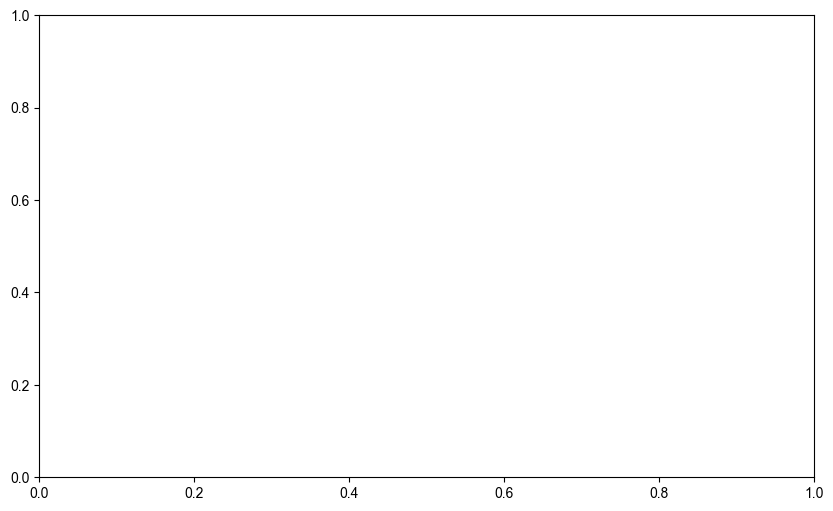

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Setting the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for opposition mentions
ax.scatter(opp_by_capacity['capacity_bin'].astype(str), opp_by_capacity['percentage_opp'], color='red', label='Opposition')

# Scatter plot for support mentions
ax.scatter(support_by_capacity['capacity_bin'].astype(str), support_by_capacity['percentage_support'], color='green', label='Support')

# Calculating R^2 values
# For opposition
opp_r2 = r2_score(opp_by_capacity['count'], opp_by_capacity['percentage_opp'])
# For support
support_r2 = r2_score(support_by_capacity['count'], support_by_capacity['percentage_support'])

# Adding R^2 values to the plot
ax.text(0.05, 0.95, f'Opposition R^2: {opp_r2:.2f}', transform=ax.transAxes, color='red')
ax.text(0.05, 0.90, f'Support R^2: {support_r2:.2f}', transform=ax.transAxes, color='green')

# Setting the title and labels
ax.set_title('Percentage of Support and Opposition Mention by Capacity')
ax.set_xlabel('Capacity (MW)')
ax.set_ylabel('Percentage of Mention')

# Customizing the x-axis labels to show only specific percentiles
ticks = ax.get_xticklabels()
selected_ticks_indices = [0, len(ticks) * 0.25, len(ticks) * 0.5, len(ticks) * 0.75, -1]
selected_ticks = [ticks[int(i)].get_text() for i in selected_ticks_indices]
ax.set_xticks(np.linspace(0, len(ticks) - 1, len(selected_ticks)))
ax.set_xticklabels(selected_ticks)

# Removing the top and rightmost lines around the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a legend
ax.legend()

plt.tight_layout()
plt.show()

